In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Statistical Analysis

In [5]:
df.duplicated().sum()

24

In [6]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [7]:
df= df.replace(' ?',np.NaN)

In [8]:
df.isin([' ', 'NA','-']).sum().any()

False

In [9]:
df.drop_duplicates(keep = 'last', inplace=True)

In [10]:
df.shape

(32536, 15)

# Missing Value Check

<AxesSubplot:>

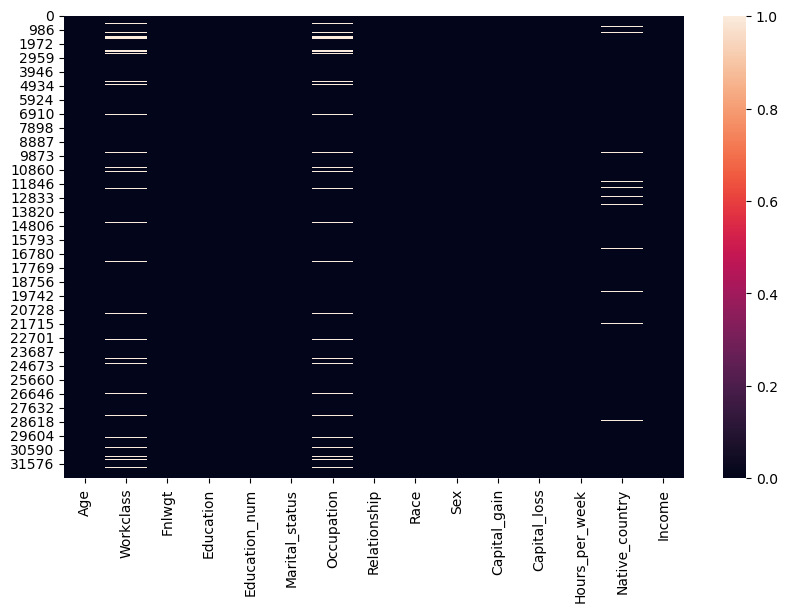

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [12]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100

print(pd.concat([missing_values, percentage_missing_values], axis =1, keys = ['Missing Values', '%Missing data']))

                Missing Values  %Missing data
Occupation                1843       5.664495
Workclass                 1836       5.642980
Native_country             582       1.788788
Age                          0       0.000000
Fnlwgt                       0       0.000000
Education                    0       0.000000
Education_num                0       0.000000
Marital_status               0       0.000000
Relationship                 0       0.000000
Race                         0       0.000000
Sex                          0       0.000000
Capital_gain                 0       0.000000
Capital_loss                 0       0.000000
Hours_per_week               0       0.000000
Income                       0       0.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [14]:
Numerical = ['Age', 'Fnlwgt', 'Education_num','Capital_gain', 'Capital_loss', 'Hours_per_week']
Category = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country', 'Income']

In [15]:
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace = True)

df['Workclass'].fillna(df['Workclass'].mode()[0],inplace = True)

df['Native_country'].fillna(df['Native_country'].mode()[0],inplace = True)

In [16]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100

print(pd.concat([missing_values, percentage_missing_values], axis =1, keys = ['Missing Values', '%Missing data']))

                Missing Values  %Missing data
Age                          0            0.0
Workclass                    0            0.0
Fnlwgt                       0            0.0
Education                    0            0.0
Education_num                0            0.0
Marital_status               0            0.0
Occupation                   0            0.0
Relationship                 0            0.0
Race                         0            0.0
Sex                          0            0.0
Capital_gain                 0            0.0
Capital_loss                 0            0.0
Hours_per_week               0            0.0
Native_country               0            0.0
Income                       0            0.0


# Statistical Matrix

<AxesSubplot:>

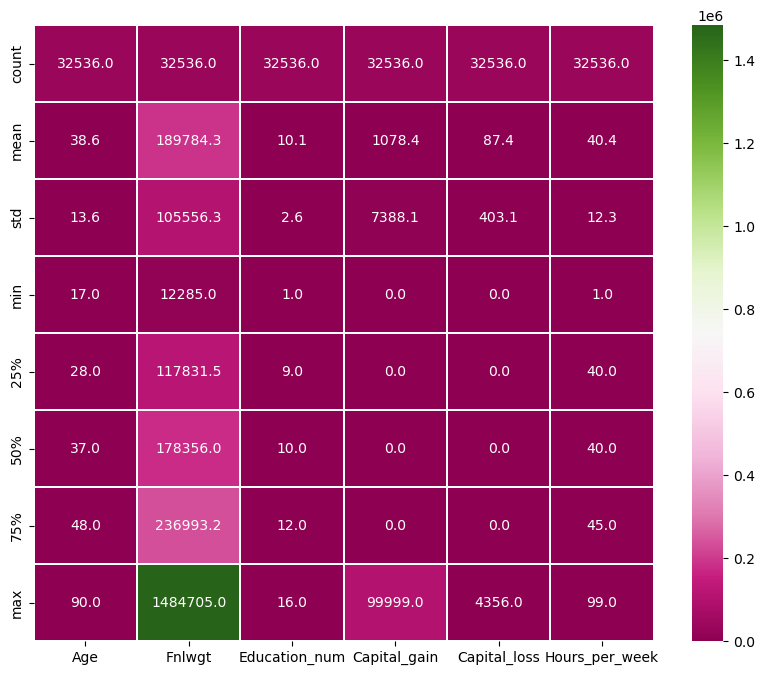

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.describe(),linewidths = 0.1, fmt='0.1f', annot = True, cmap='PiYG')

In [18]:
df.describe().T

count           mean            std      min       25%  \
Age             32536.0      38.585536      13.638193     17.0      28.0   
Fnlwgt          32536.0  189784.298992  105556.258211  12285.0  117831.5   
Education_num   32536.0      10.081725       2.571622      1.0       9.0   
Capital_gain    32536.0    1078.410069    7388.068465      0.0       0.0   
Capital_loss    32536.0      87.370912     403.107737      0.0       0.0   
Hours_per_week  32536.0      40.440343      12.347079      1.0      40.0   

                     50%        75%        max  
Age                 37.0      48.00       90.0  
Fnlwgt          178356.0  236993.25  1484705.0  
Education_num       10.0      12.00       16.0  
Capital_gain         0.0       0.00    99999.0  
Capital_loss         0.0       0.00     4356.0  
Hours_per_week      40.0      45.00       99.0

In [19]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       5979
 Craft-repair         40

# EDA

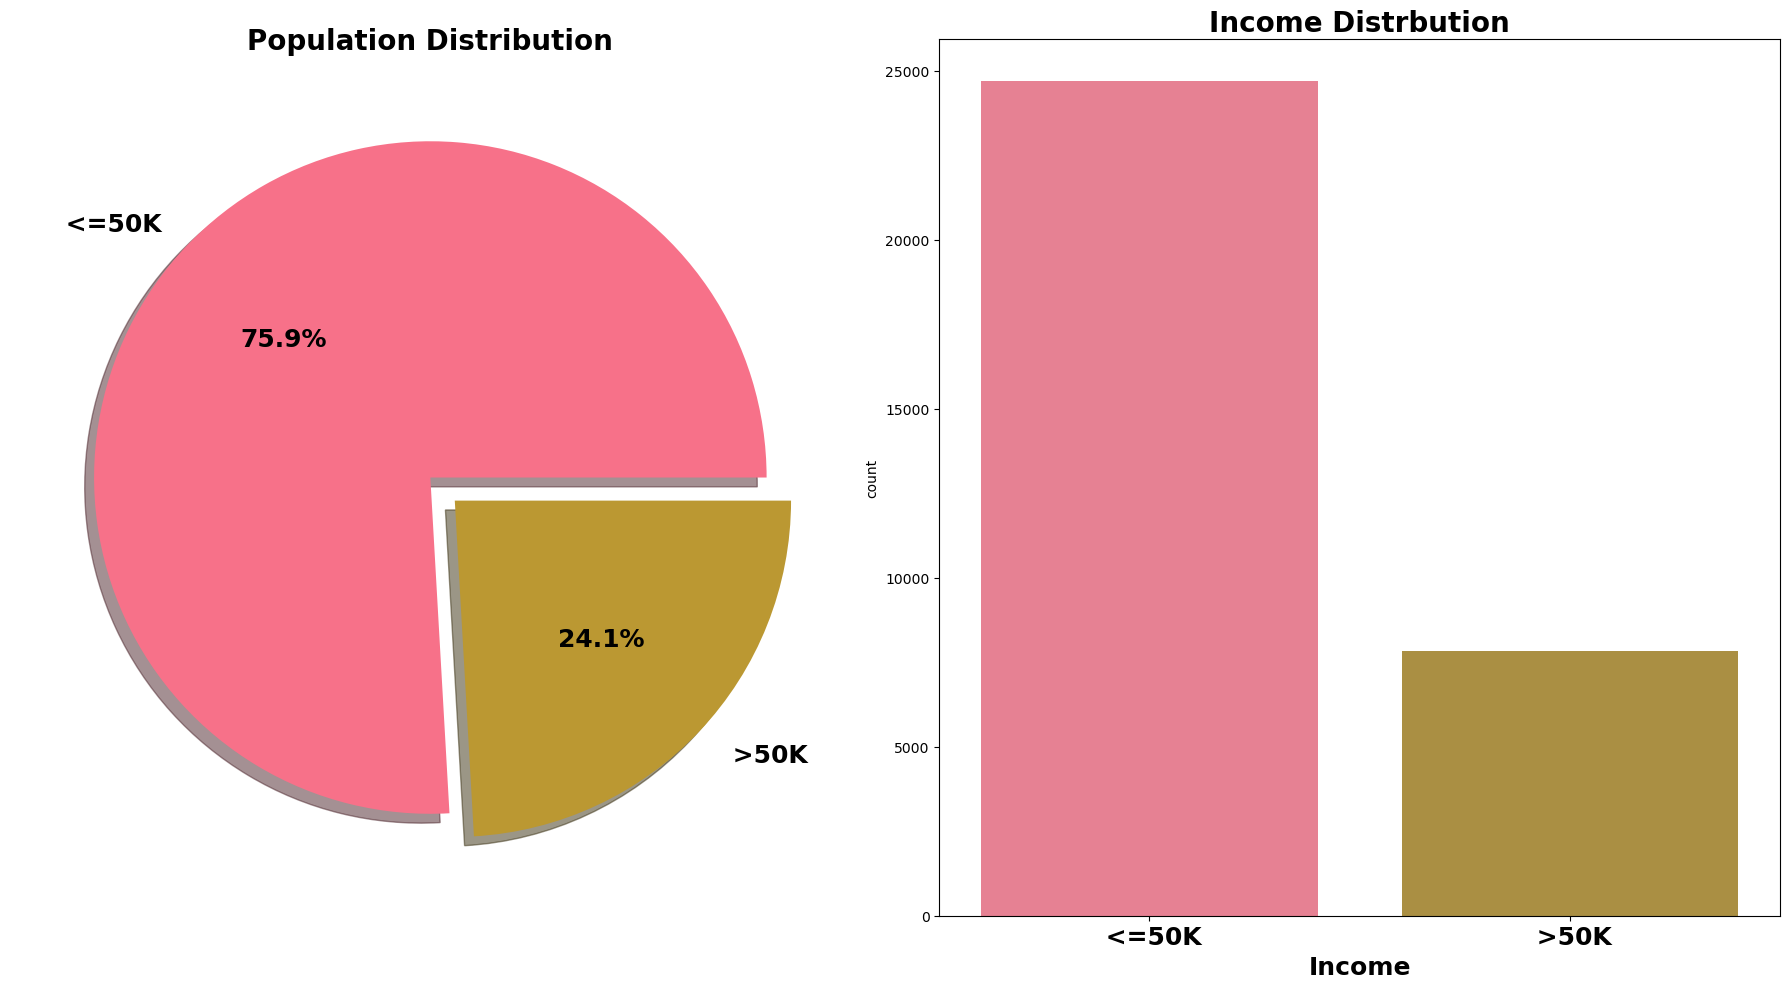

In [20]:
plt.rcParams['figure.autolayout']=True
sns.set_palette('husl')
f,ax= plt.subplots(1,2,figsize=(18,10))
df['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%', textprops = {'fontweight' : 'bold', 'fontsize':18}, ax=ax[0],shadow=True)

ax[0].set_title('Population Distribution', fontsize=20, fontweight = 'bold')
ax[0].set_ylabel('')
sns.countplot('Income', data=df, ax=ax[1])
ax[1].set_title('Income Distrbution',fontsize=20, fontweight='bold')
ax[1].set_xlabel('Income', fontsize=18, fontweight='bold')
plt.xticks(fontsize= 18, fontweight='bold')
plt.show()

In [21]:
print('Minimum Age:', df['Age'].min(),'years')
print('Maximum Age:', df['Age'].max(),'years')
print('Average Age:', df['Age'].mean(),'years')

Minimum Age: 17 years
Maximum Age: 90 years
Average Age: 38.58553602163757 years


In [22]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if (18 < x < 31):
        return '19-30'
    if (30 < x < 41):
        return '31-40'
    if (40 < x < 51):
        return '41-50'
    if (50 < x < 61):
        return '51-60'
    if (60 < x < 71):
        return '61-70'
    else:
        return 'Greater Than 70'

In [23]:
df['age_group']= df['Age'].apply(age_group)

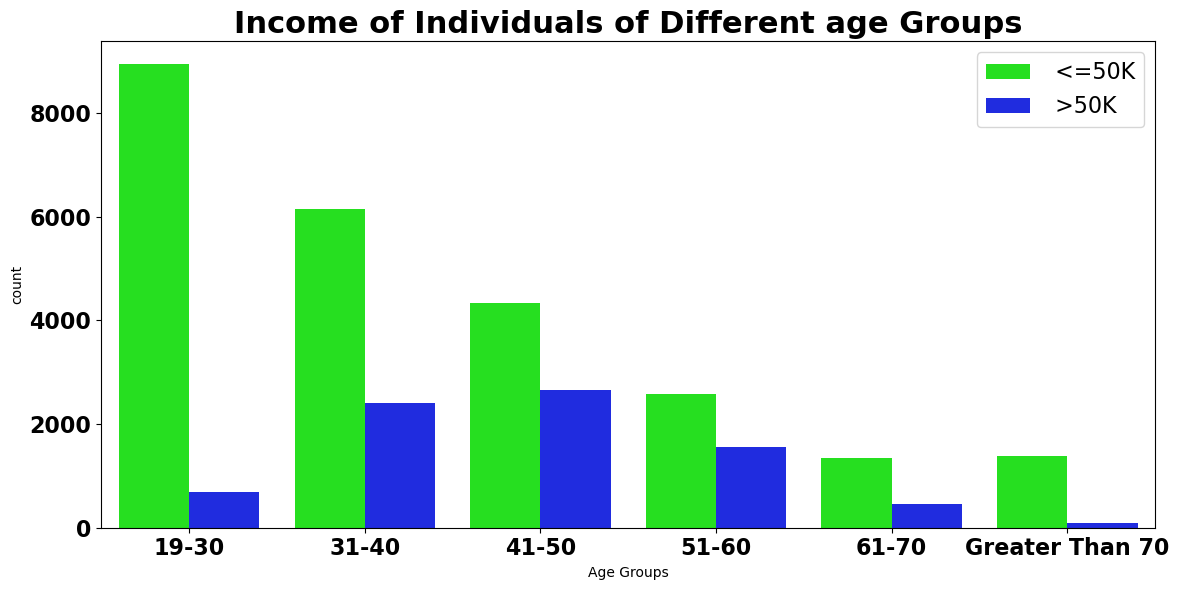

In [24]:
plt.figure(figsize= (12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater Than 70']
p = sns.countplot(df['age_group'], hue=df ['Income'], palette ='hsv', order=order_list)
plt.title('Income of Individuals of Different age Groups', fontsize= 22, fontweight='bold')
p.set_xlabel('Age Groups')
plt.xticks(fontsize = 16, fontweight = 'bold')
plt.yticks(fontsize = 16, fontweight = 'bold')
plt.legend(fontsize= 16)
plt.show()

In [25]:
ax= sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

In [26]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%', textprops = {'fontsize':13},shadow=True)

plt.title('Population distribution as per Workclass', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

In [27]:
plt.figure(figsize= (14,9))
p = sns.countplot(df['Workclass'], hue=df ['Income'], palette ='hsv')
plt.title('Income Distribution as per Workclass', fontsize= 22, fontweight='bold')
p.set_xlabel('Workclass')
plt.xticks(fontsize = 16, fontweight = 'bold', rotation=30)
plt.yticks(fontsize = 16, fontweight = 'bold')
plt.legend(fontsize= 16)
plt.show()

In [28]:
pd.crosstab(df['Income'],df['Workclass'], margins=True).style.background_gradient(cmap= 'summer_r')

### Education vs Income

In [29]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%', textprops = {'fontsize':12},shadow=True)

plt.title('Population distribution as per Workclass', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

In [30]:
plt.figure(figsize= (15,8))
p = sns.countplot(df['Education'], hue=df ['Income'], palette ='hsv')
plt.title('Income Distribution as per Education', fontsize= 22, fontweight='bold')
p.set_xlabel('Education')
plt.xticks(fontsize = 16, fontweight = 'bold', rotation=30)
plt.yticks(fontsize = 16, fontweight = 'bold')
plt.legend(fontsize= 16)
plt.show()

In [31]:
pd.crosstab(df['Education'],df['Workclass'], margins=True).style.background_gradient(cmap= 'summer_r')

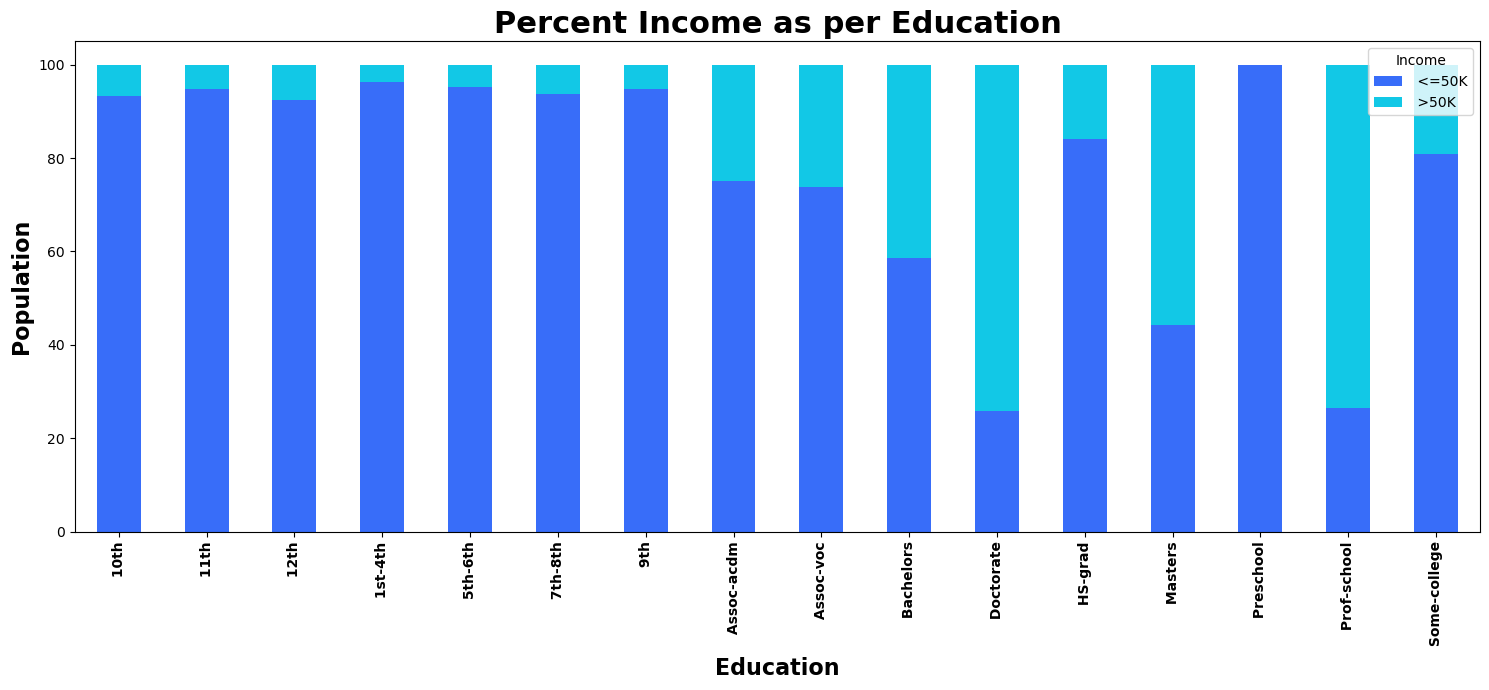

In [32]:
sns.set_palette('rainbow')
table= pd.crosstab(df['Education'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar', stacked= True,figsize= (15,7) )
plt.title('Percent Income as per Education', fontsize= 22, fontweight='bold')
plt.xlabel('Education', fontsize = 16, fontweight = 'bold')
plt.ylabel('Population', fontsize = 16, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.show()

### Impact of Marital Status on income

In [33]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%', textprops = {'fontsize':12},shadow=True)

plt.title('Population distribution as per Marital Status', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

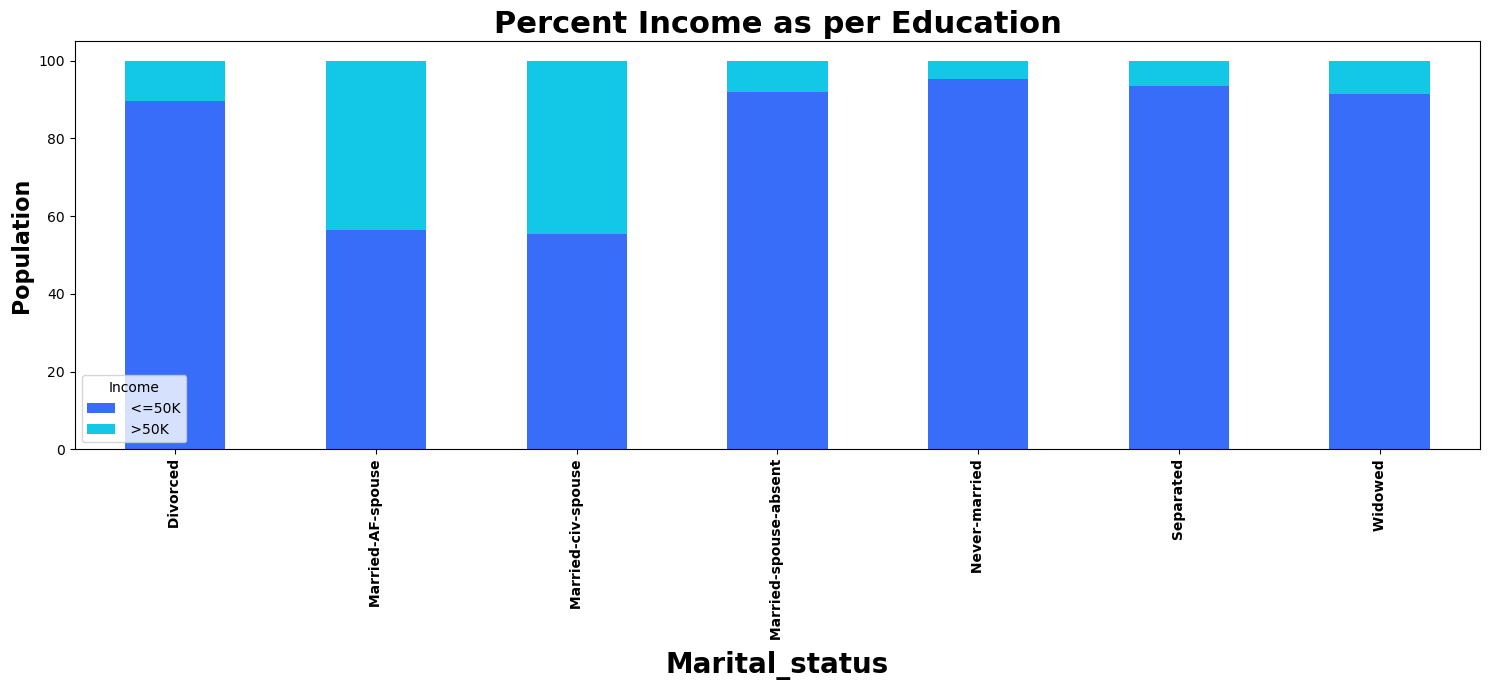

In [34]:
sns.set_palette('rainbow')
table= pd.crosstab(df['Marital_status'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar', stacked= True,figsize= (15,7) )
plt.title('Percent Income as per Education', fontsize= 22, fontweight='bold')
plt.xlabel('Marital_status', fontsize = 20, fontweight = 'bold')
plt.ylabel('Population', fontsize = 16, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.show()

In [35]:
pd.crosstab(df['Marital_status'],df['Income'], margins=True).style.background_gradient(cmap= 'summer_r')

### Occupation vs Income

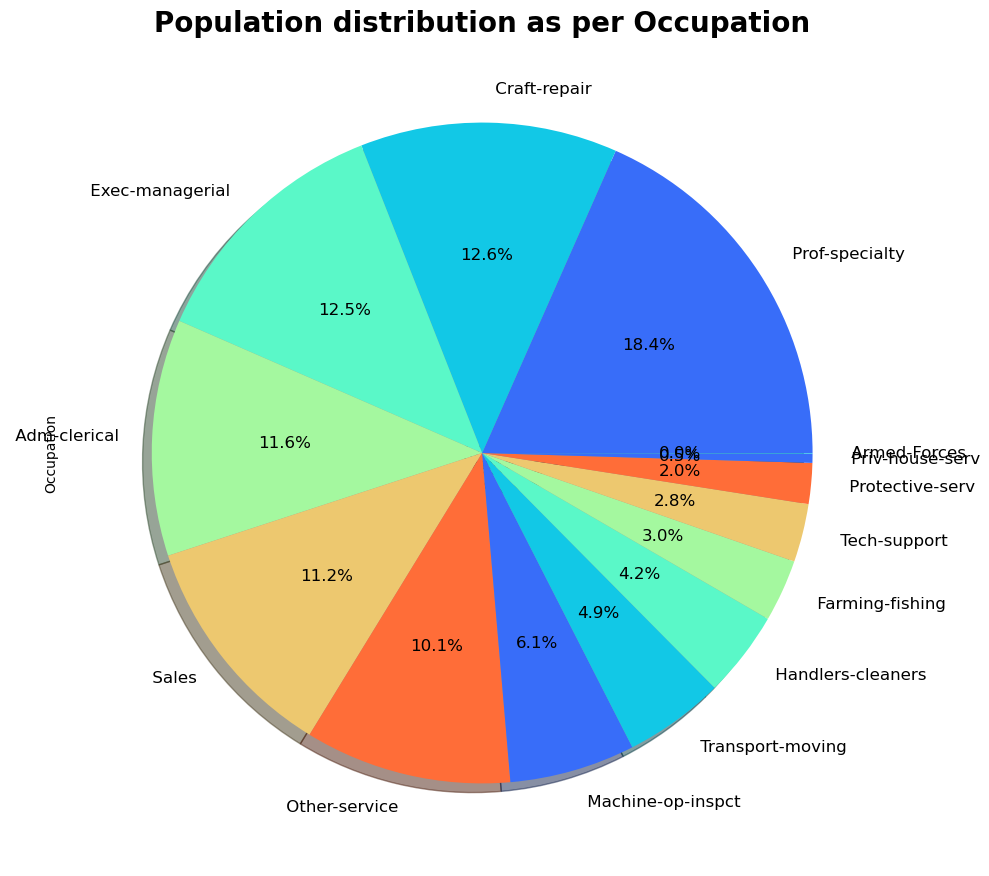

In [36]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%', textprops = {'fontsize':12},shadow=True)

plt.title('Population distribution as per Occupation', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

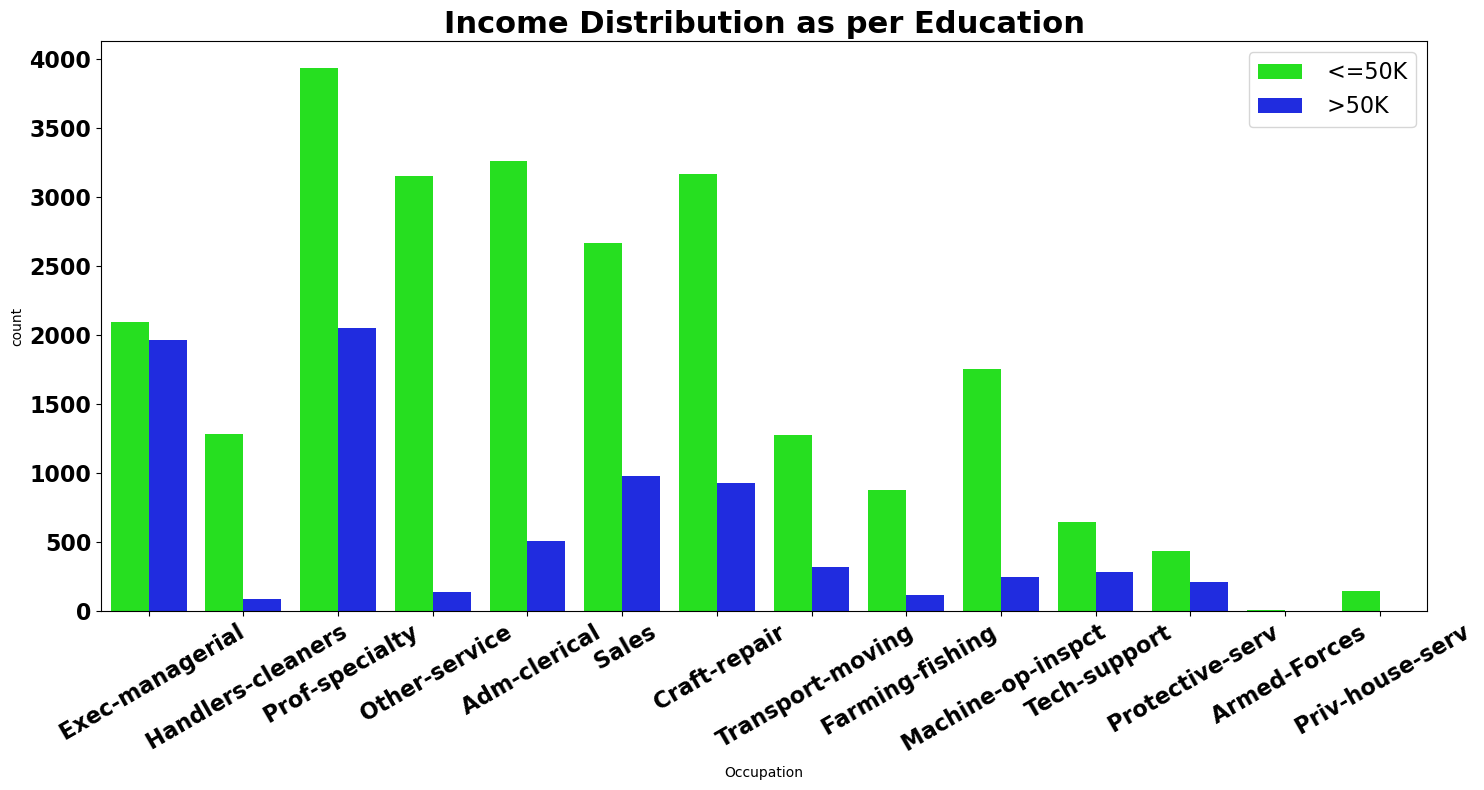

In [37]:
plt.figure(figsize= (15,8))
p = sns.countplot(df['Occupation'], hue=df ['Income'], palette ='hsv')
plt.title('Income Distribution as per Education', fontsize= 22, fontweight='bold')
p.set_xlabel('Occupation')
plt.xticks(fontsize = 16, fontweight = 'bold', rotation=30)
plt.yticks(fontsize = 16, fontweight = 'bold')
plt.legend(fontsize= 16)
plt.show()

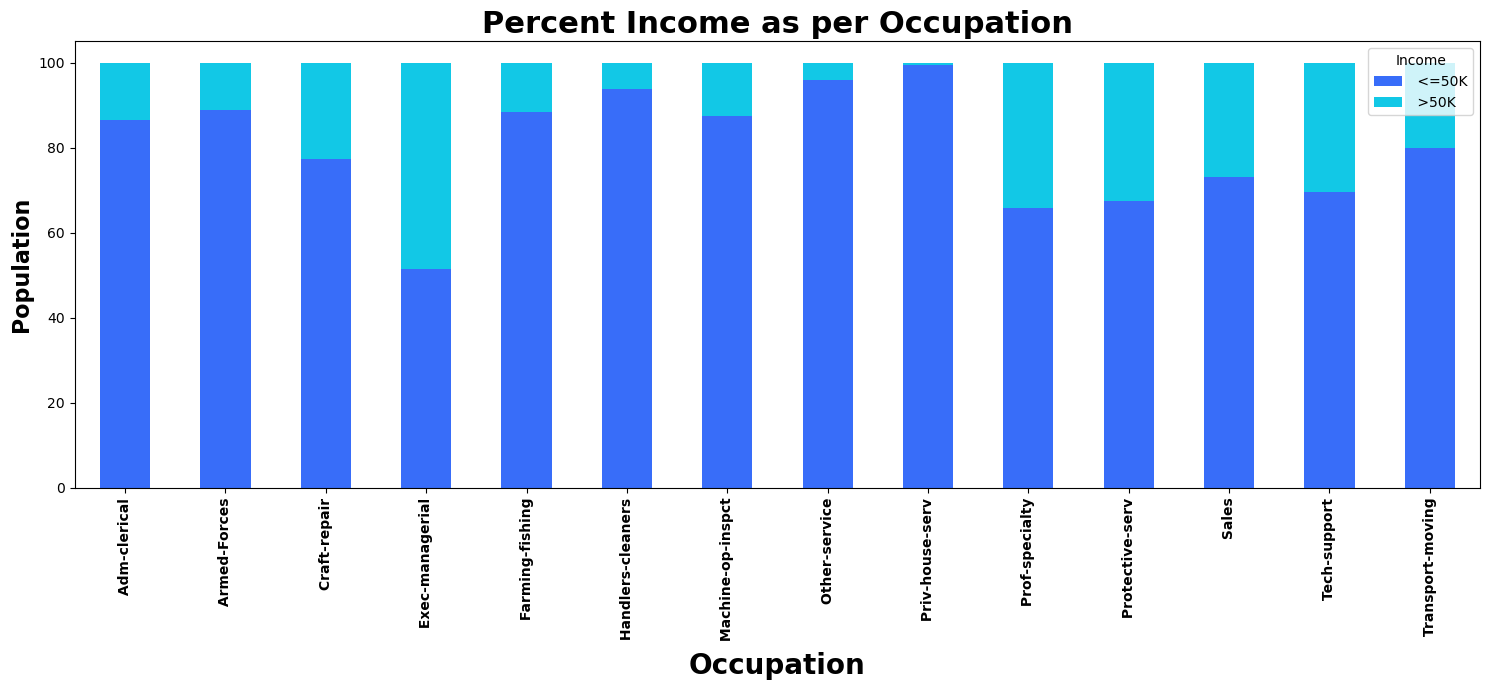

In [38]:
sns.set_palette('rainbow')
table= pd.crosstab(df['Occupation'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar', stacked= True,figsize= (15,7) )
plt.title('Percent Income as per Occupation', fontsize= 22, fontweight='bold')
plt.xlabel('Occupation', fontsize = 20, fontweight = 'bold')
plt.ylabel('Population', fontsize = 16, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.show()

In [39]:
pd.crosstab(df['Occupation'],df['Income'], margins=True).style.background_gradient(cmap= 'summer_r')

In [40]:
pd.crosstab(df['Occupation'],df['Workclass'], margins=True).style.background_gradient(cmap= 'summer_r')

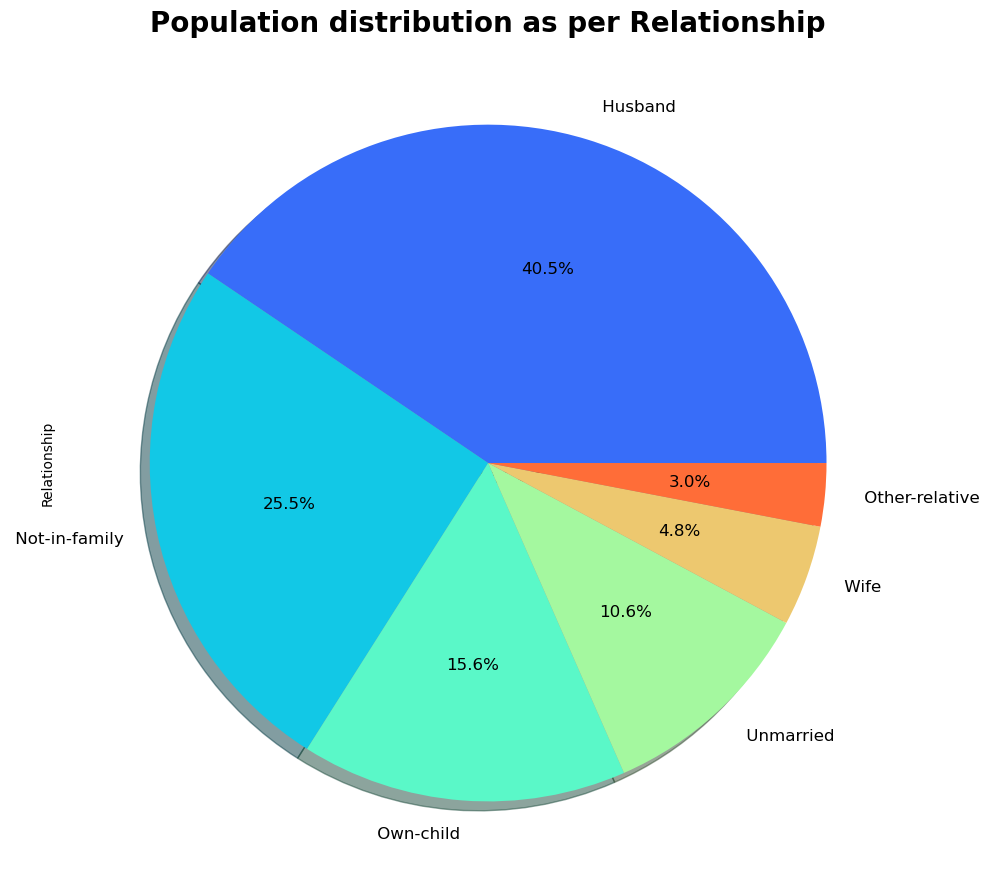

In [41]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%', textprops = {'fontsize':12},shadow=True)

plt.title('Population distribution as per Relationship', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

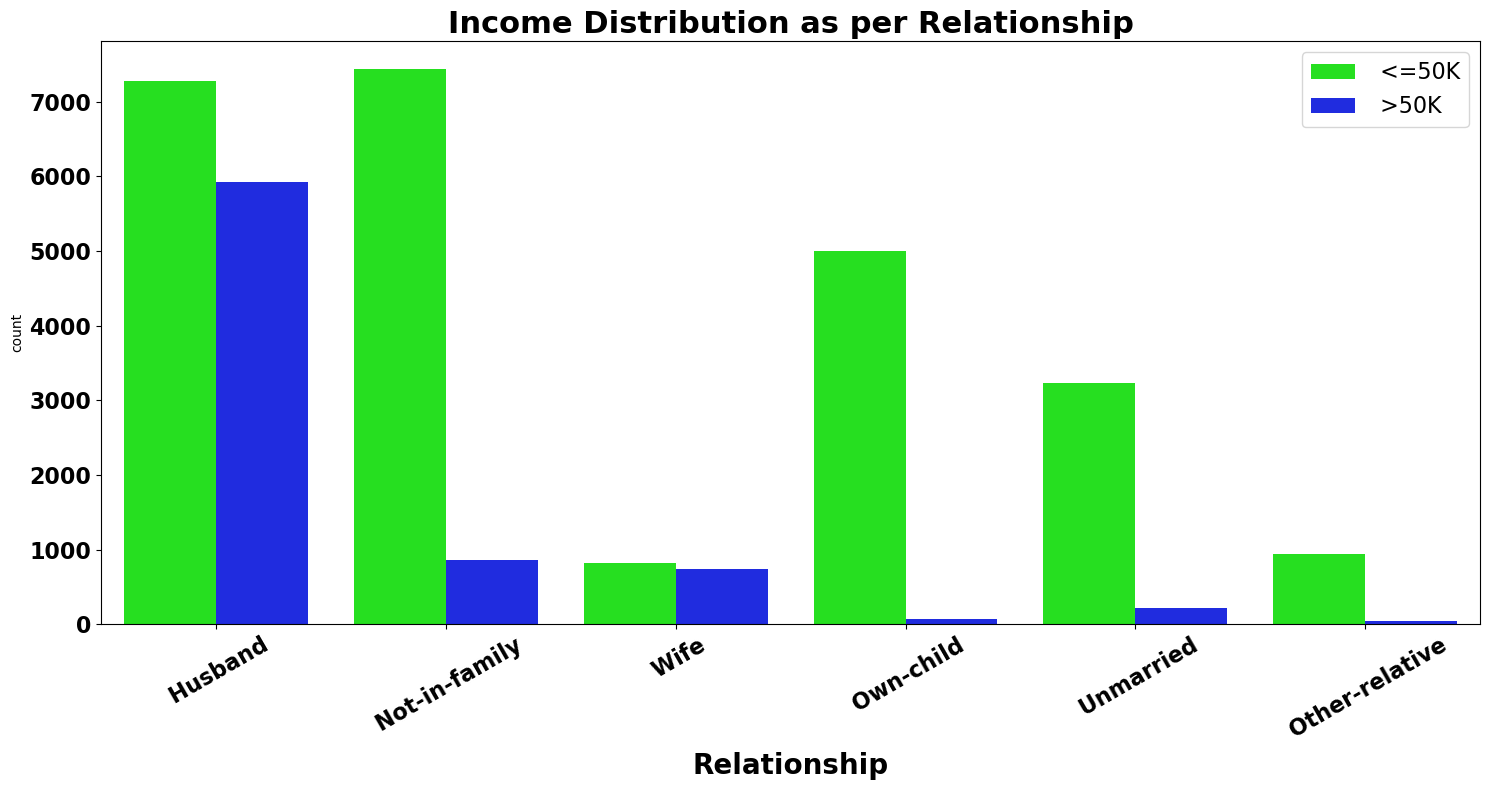

In [42]:
plt.figure(figsize= (15,8))
p = sns.countplot(df['Relationship'], hue=df ['Income'], palette ='hsv')
plt.title('Income Distribution as per Relationship', fontsize= 22, fontweight='bold')
p.set_xlabel('Relationship', fontsize=20,fontweight = 'bold')
plt.xticks(fontsize = 16, fontweight = 'bold', rotation=30)
plt.yticks(fontsize = 16, fontweight = 'bold')
plt.legend(fontsize= 16)
plt.show()

### Race vs Income

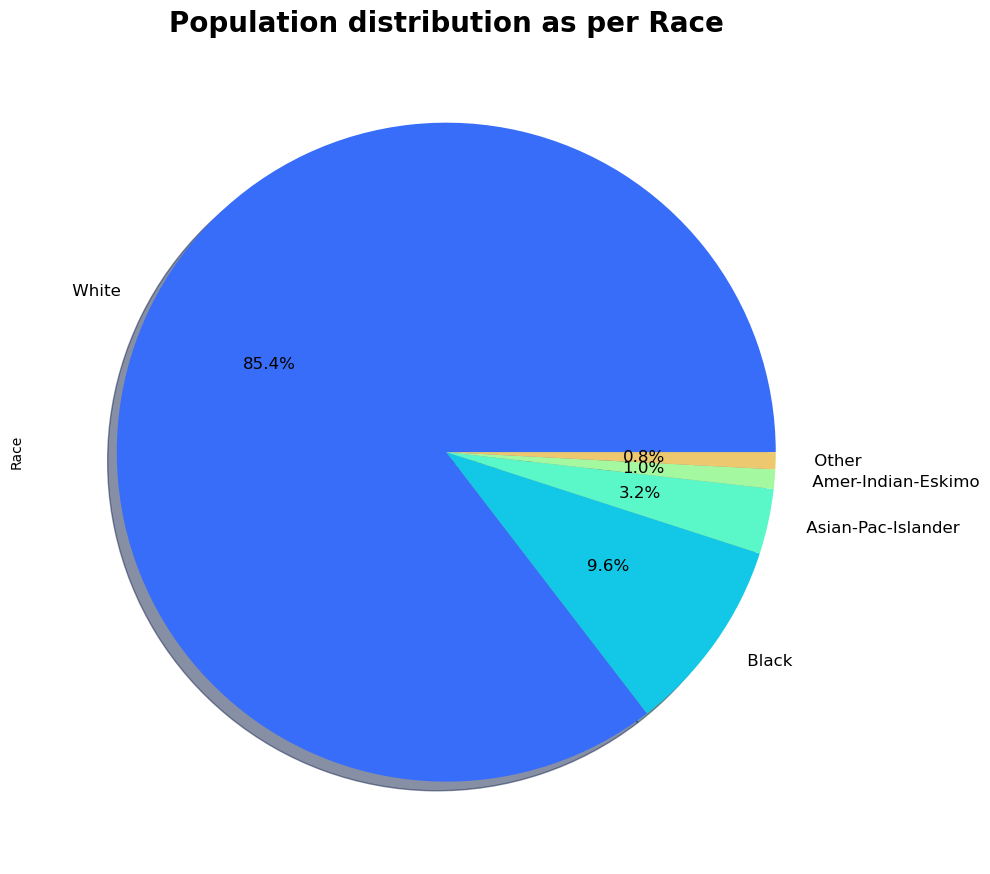

In [43]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Race'].value_counts().plot.pie(autopct='%2.1f%%', textprops = {'fontsize':12},shadow=True)

plt.title('Population distribution as per Race', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

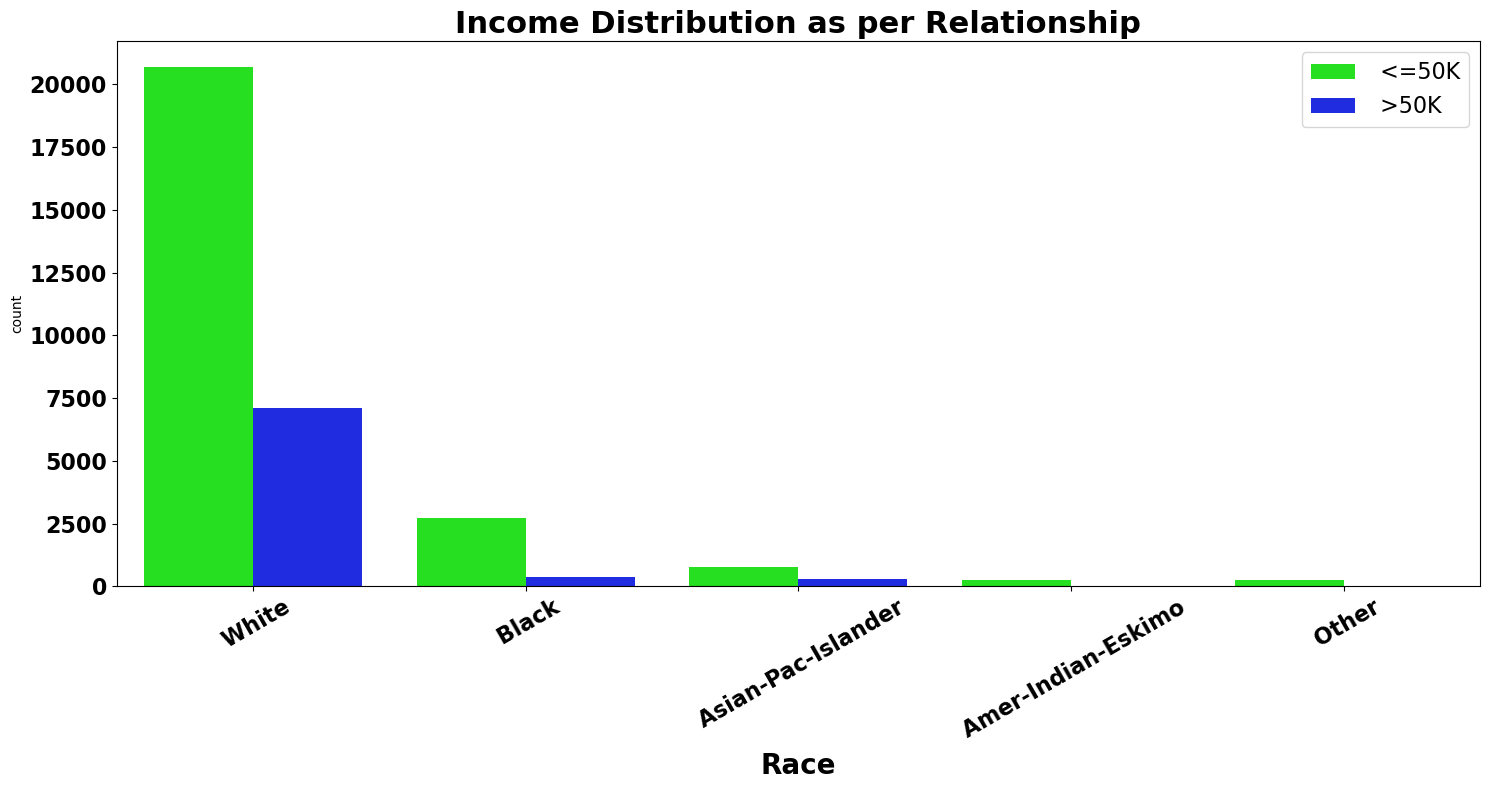

In [44]:
plt.figure(figsize= (15,8))
p = sns.countplot(df['Race'], hue=df ['Income'], palette ='hsv')
plt.title('Income Distribution as per Relationship', fontsize= 22, fontweight='bold')
p.set_xlabel('Race', fontsize=20,fontweight = 'bold')
plt.xticks(fontsize = 16, fontweight = 'bold', rotation=30)
plt.yticks(fontsize = 16, fontweight = 'bold')
plt.legend(fontsize= 16)
plt.show()

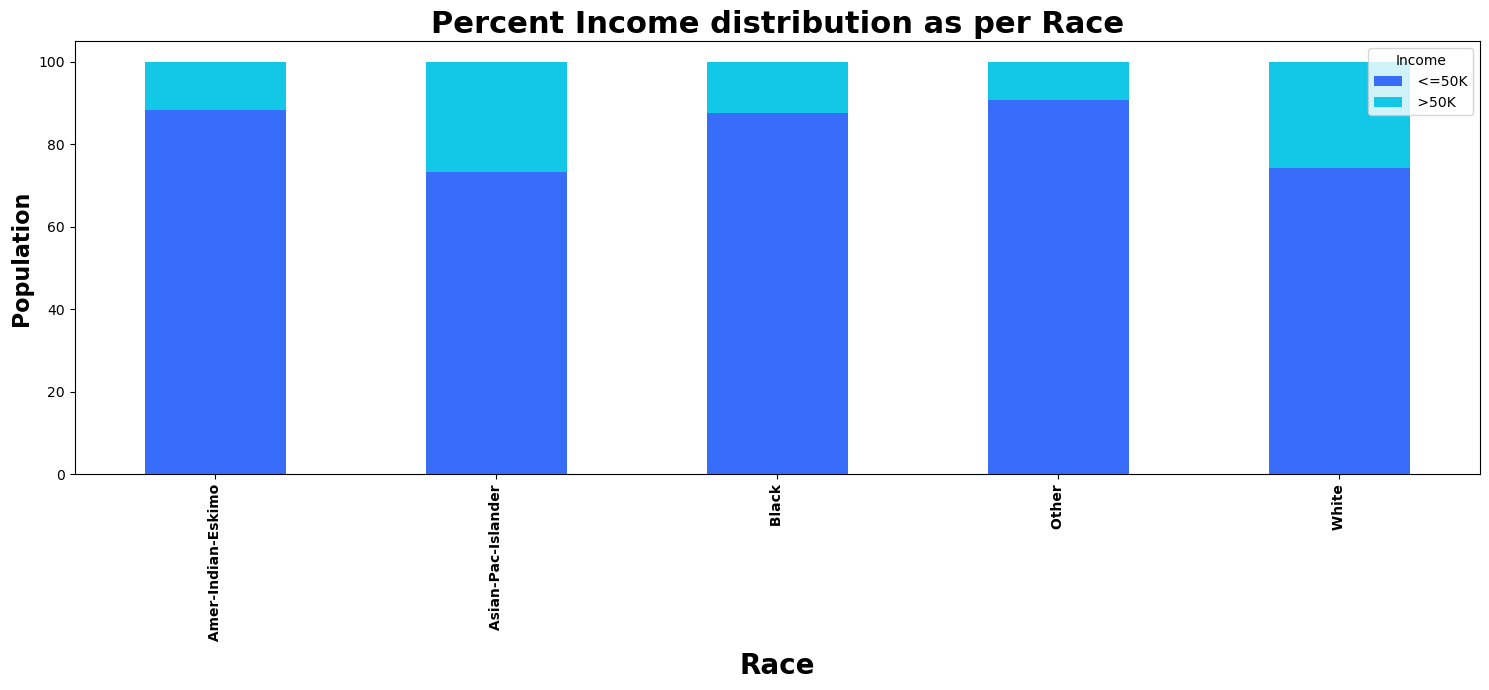

In [45]:
sns.set_palette('rainbow')
table= pd.crosstab(df['Race'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar', stacked= True,figsize= (15,7) )
plt.title('Percent Income distribution as per Race', fontsize= 22, fontweight='bold')
plt.xlabel('Race', fontsize = 20, fontweight = 'bold')
plt.ylabel('Population', fontsize = 16, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.show()

### Sex vs income

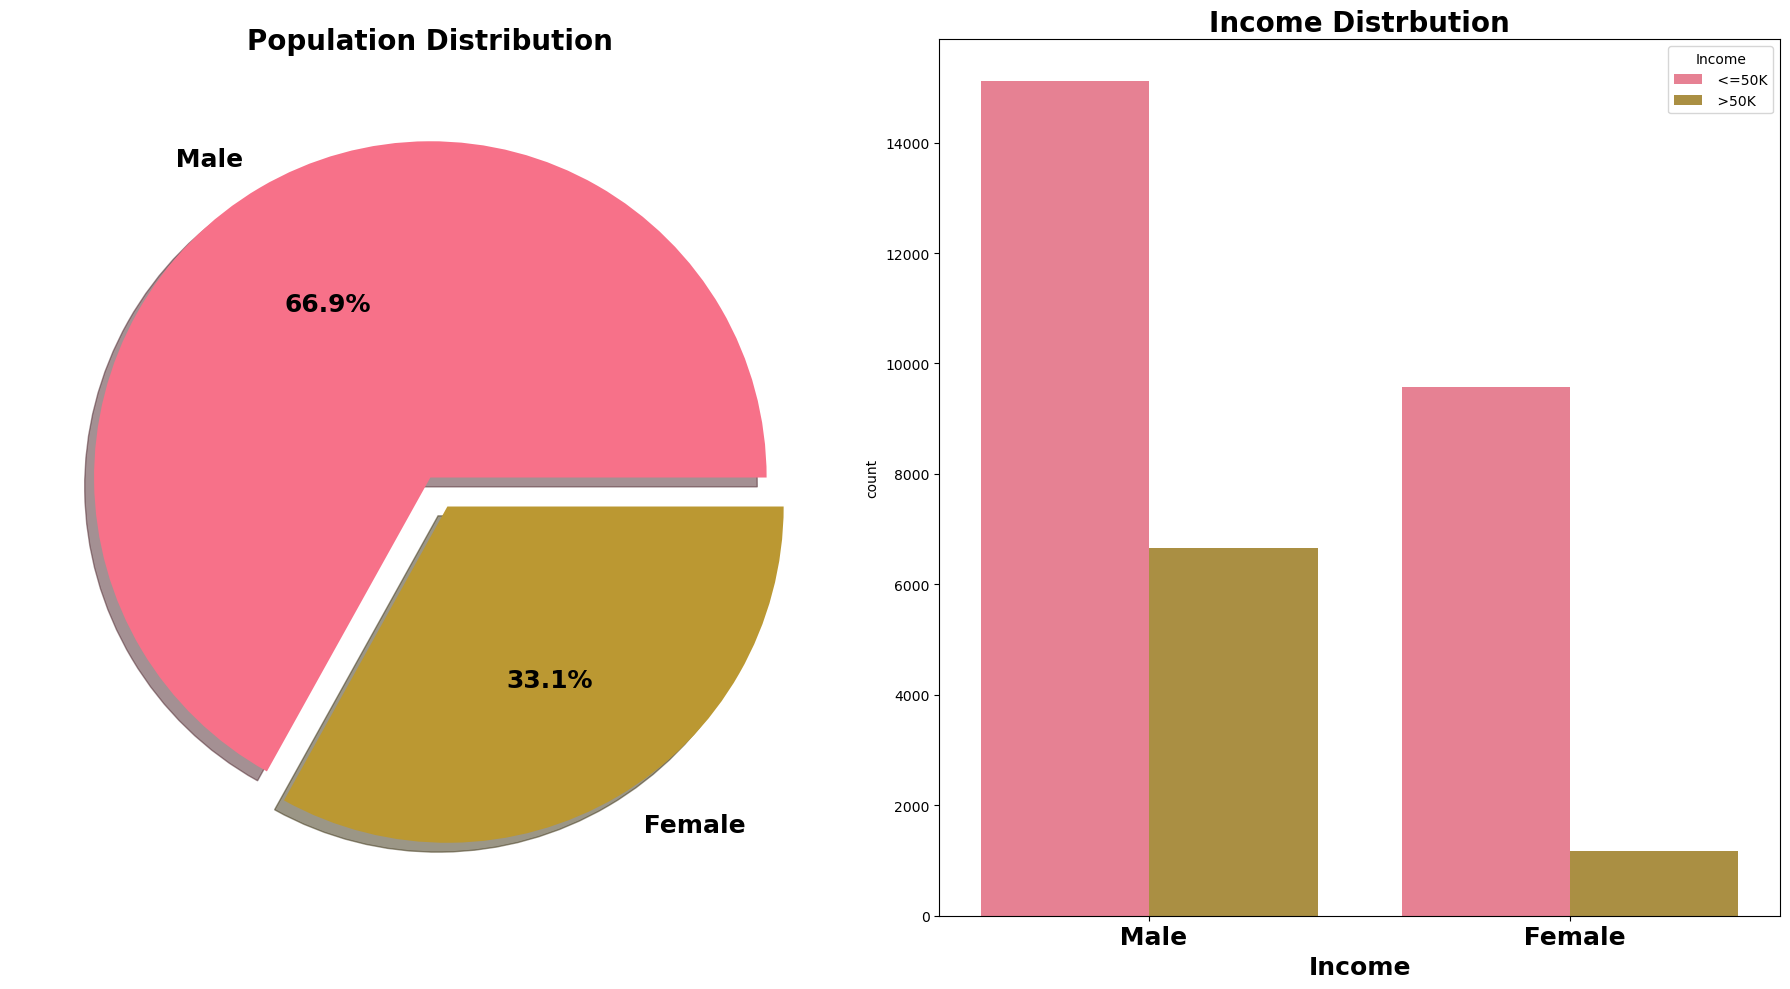

In [46]:
plt.rcParams['figure.autolayout']=True
sns.set_palette('husl')
f,ax= plt.subplots(1,2,figsize=(18,10))
df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%', textprops = {'fontweight' : 'bold', 'fontsize':18}, ax=ax[0],shadow=True)

ax[0].set_title('Population Distribution', fontsize=20, fontweight = 'bold')
ax[0].set_ylabel('')
sns.countplot('Sex',hue=df['Income'], data=df, ax=ax[1])
ax[1].set_title('Income Distrbution',fontsize=20, fontweight='bold')
ax[1].set_xlabel('Income', fontsize=18, fontweight='bold')
plt.xticks(fontsize= 18, fontweight='bold')
plt.show()

In [47]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income], margins=True).style.background_gradient(cmap= 'summer_r')

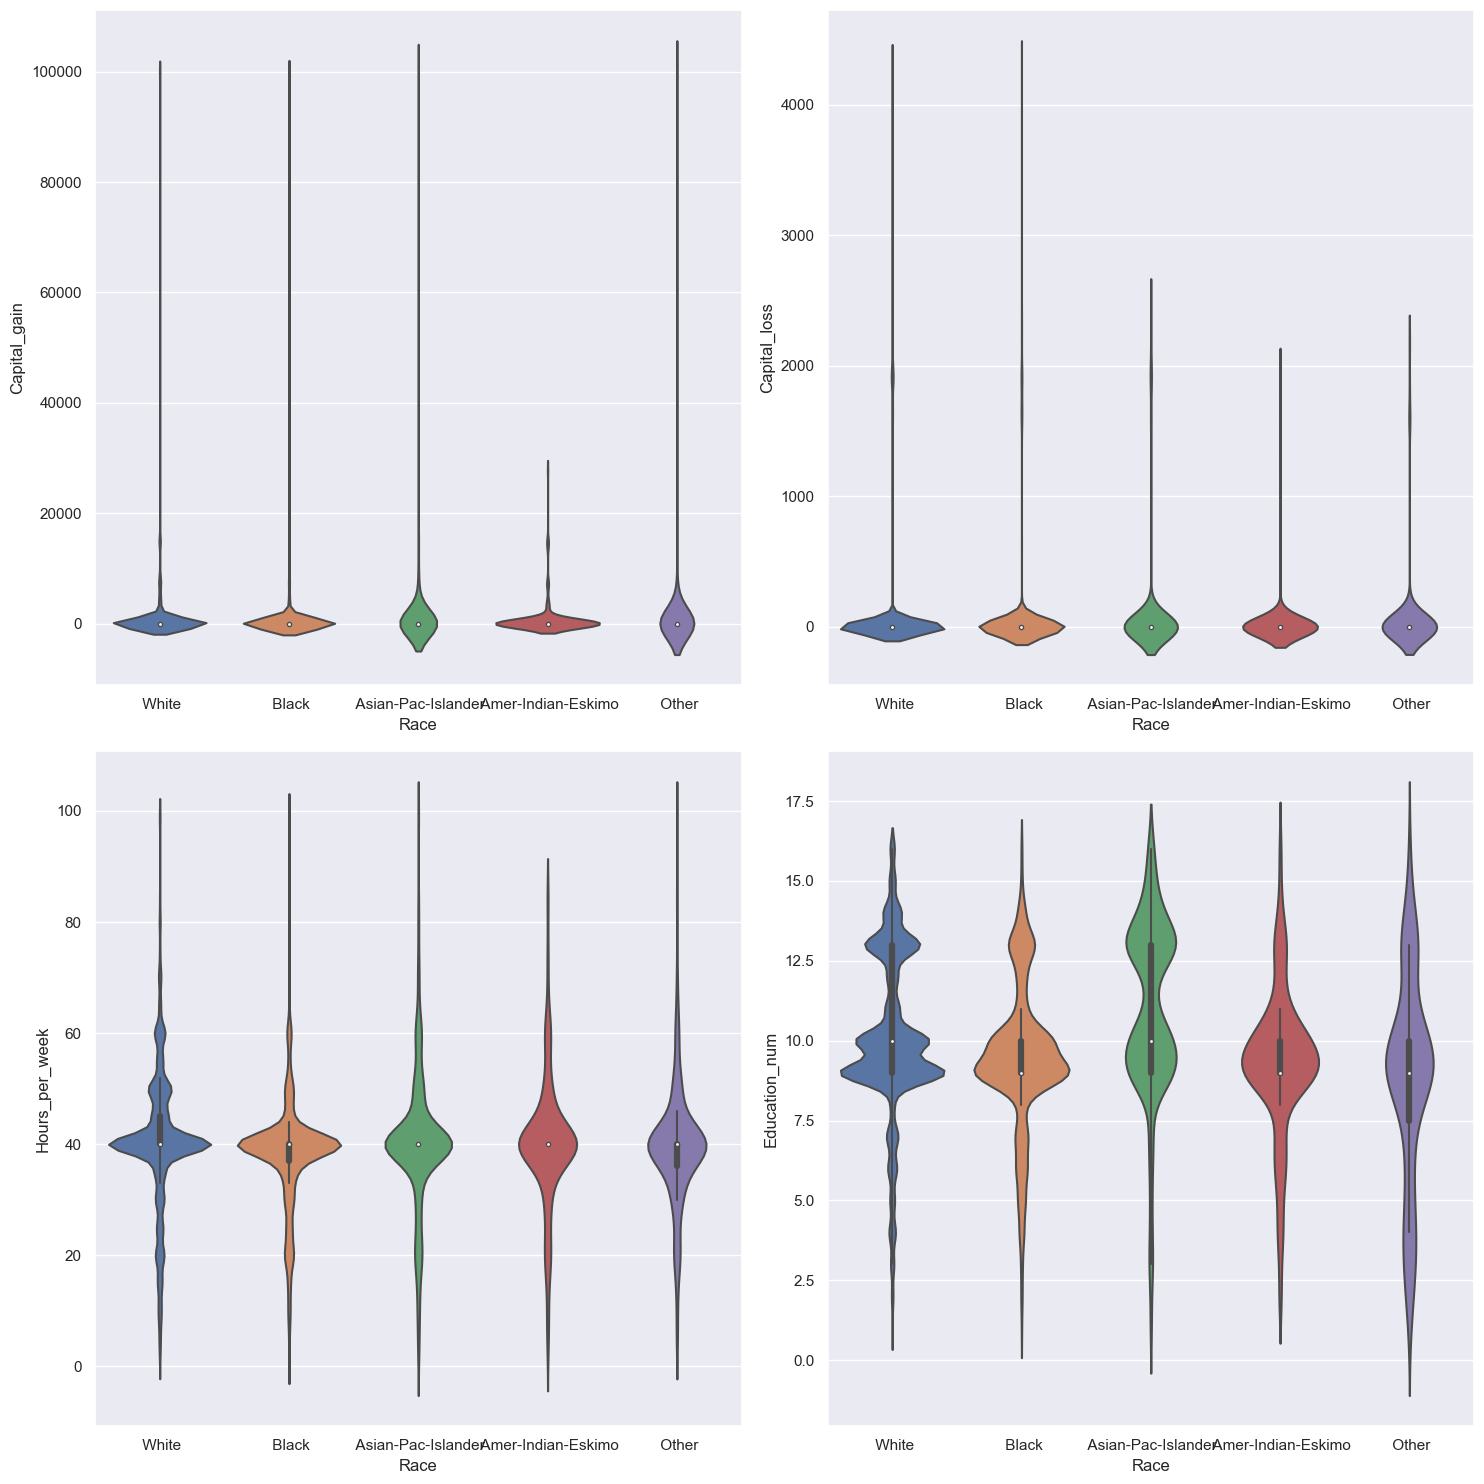

In [48]:
plt.rcParams['figure.figsize']=[15,15]
sns.set(style= 'darkgrid')

plt.subplot(2,2,1)
sns.violinplot(x= df['Race'], y=df['Capital_gain'], data=df);
plt.subplot(2,2,2)
sns.violinplot(x= df['Race'], y=df['Capital_loss'], data=df);
plt.subplot(2,2,3)
sns.violinplot(x= df['Race'], y=df['Hours_per_week'], data = df);
plt.subplot(2,2,4)
sns.violinplot(x= df['Race'], y=df['Education_num'], data=df);

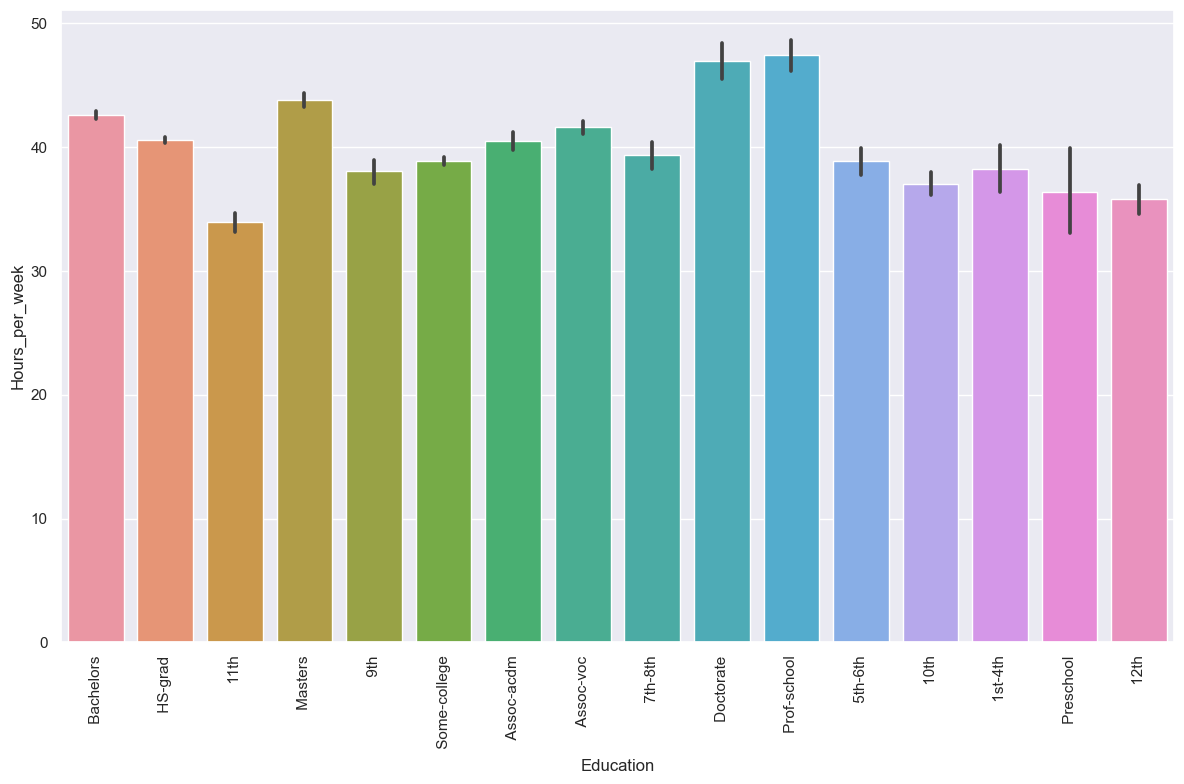

In [49]:
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x= df['Education'], y=df['Hours_per_week'],data=df)
plt.setp(sns_grad.get_xticklabels(), rotation=90)
plt.show()

In [50]:
plt.figure(figsize=(15,15))
plt.title('Income in each Native Country')
sns.pointplot(x='Native_country', y='Education_num', data=df, hue='Income', join=False, palette='Set2', ci='sd')
plt.xticks(rotation=90)
plt.show()

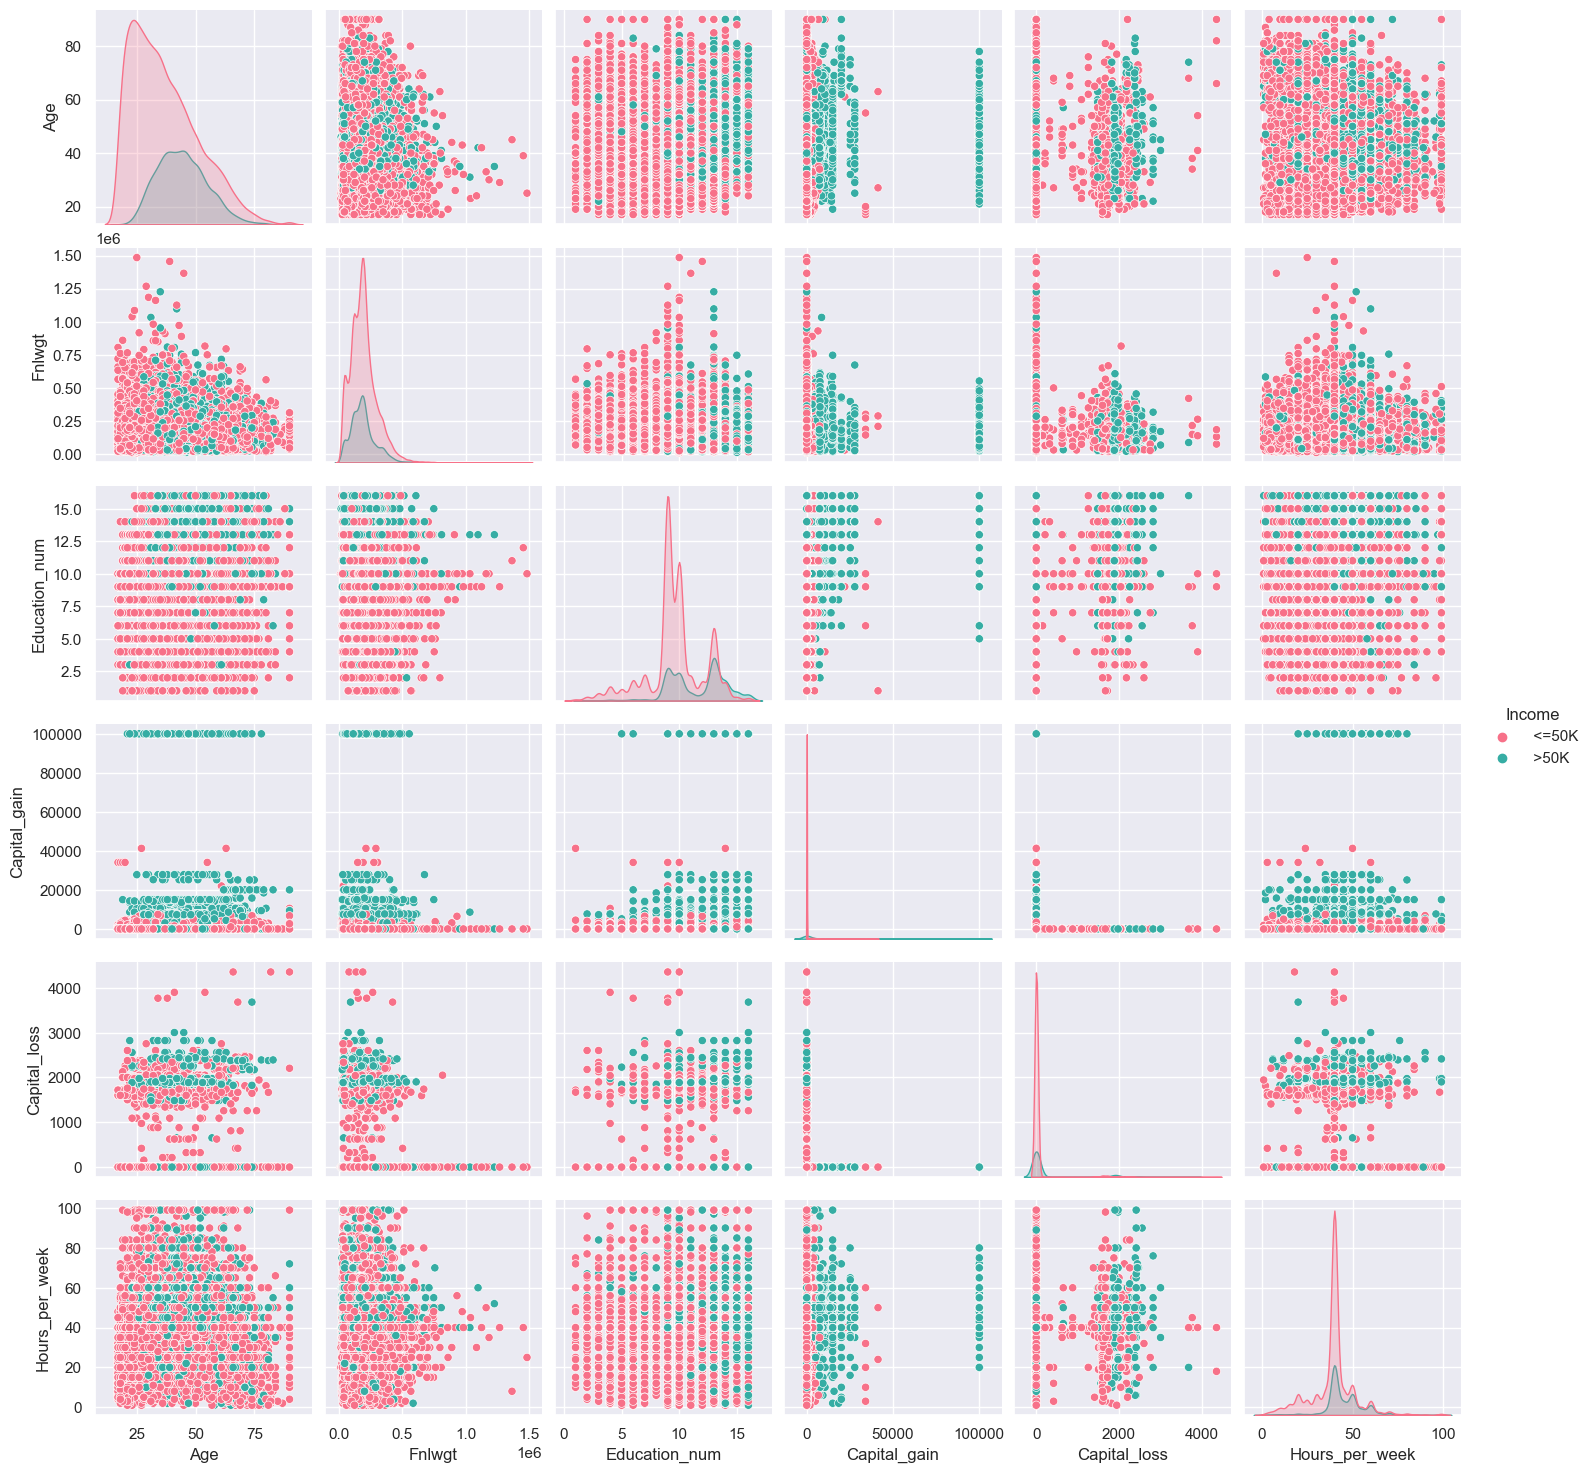

In [51]:
sns.pairplot(df, hue='Income', palette='husl')

In [54]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [53]:
df.drop(['age_group'], axis=1, inplace=True)

# Encoding categorical data

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          5   83311          9             13               2   
1   38          3  215646         11              9               0   
2   53          3  234721          1              7               2   
3   28          3  338409          9             13               2   
4   37          3  284582         12             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           3             0     4    1             0             0   
1           5             1     4    1             0             0   
2           5             0     2    1             0             0   
3           9             5     2    0             0             0   
4           3             5     4    0             0             0   

   Hours_per_week  Native_country  Income  
0              13              38       0  
1              40              38       0  
2              40              38       0  
3              40               4       0  
4              40              38       0

# Feature selection and Engineering

### 1.Outliers detection and Removal

In [56]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col], color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

In [57]:
df.drop(['Fnlwgt', 'Education'], axis=1, inplace=True)

### Outliers removal using Zscore method

In [58]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold= 3
df1= df[(z<3).all(axis = 1)]

print('Shape of the dataframe before removig outliers:',df.shape)
print('Shape of the dataframe after removig outliers:',df1.shape)
print('Percentage of data loss post outliers removal :',(df.shape[0]-df1.shape[0])/df.shape[0]*100)

df = df1.copy()

Shape of the dataframe before removig outliers: (32536, 13)
Shape of the dataframe after removig outliers: (28061, 13)
Percentage of data loss post outliers removal : 13.753995574133269


In [59]:
print('033[1m'+'Percentage Data Loss:'+'\033[0m', ((32536-28061)/32536)*100,'%')

033Percentage Data Loss: 13.753995574133269 %


## 2. skewness of features

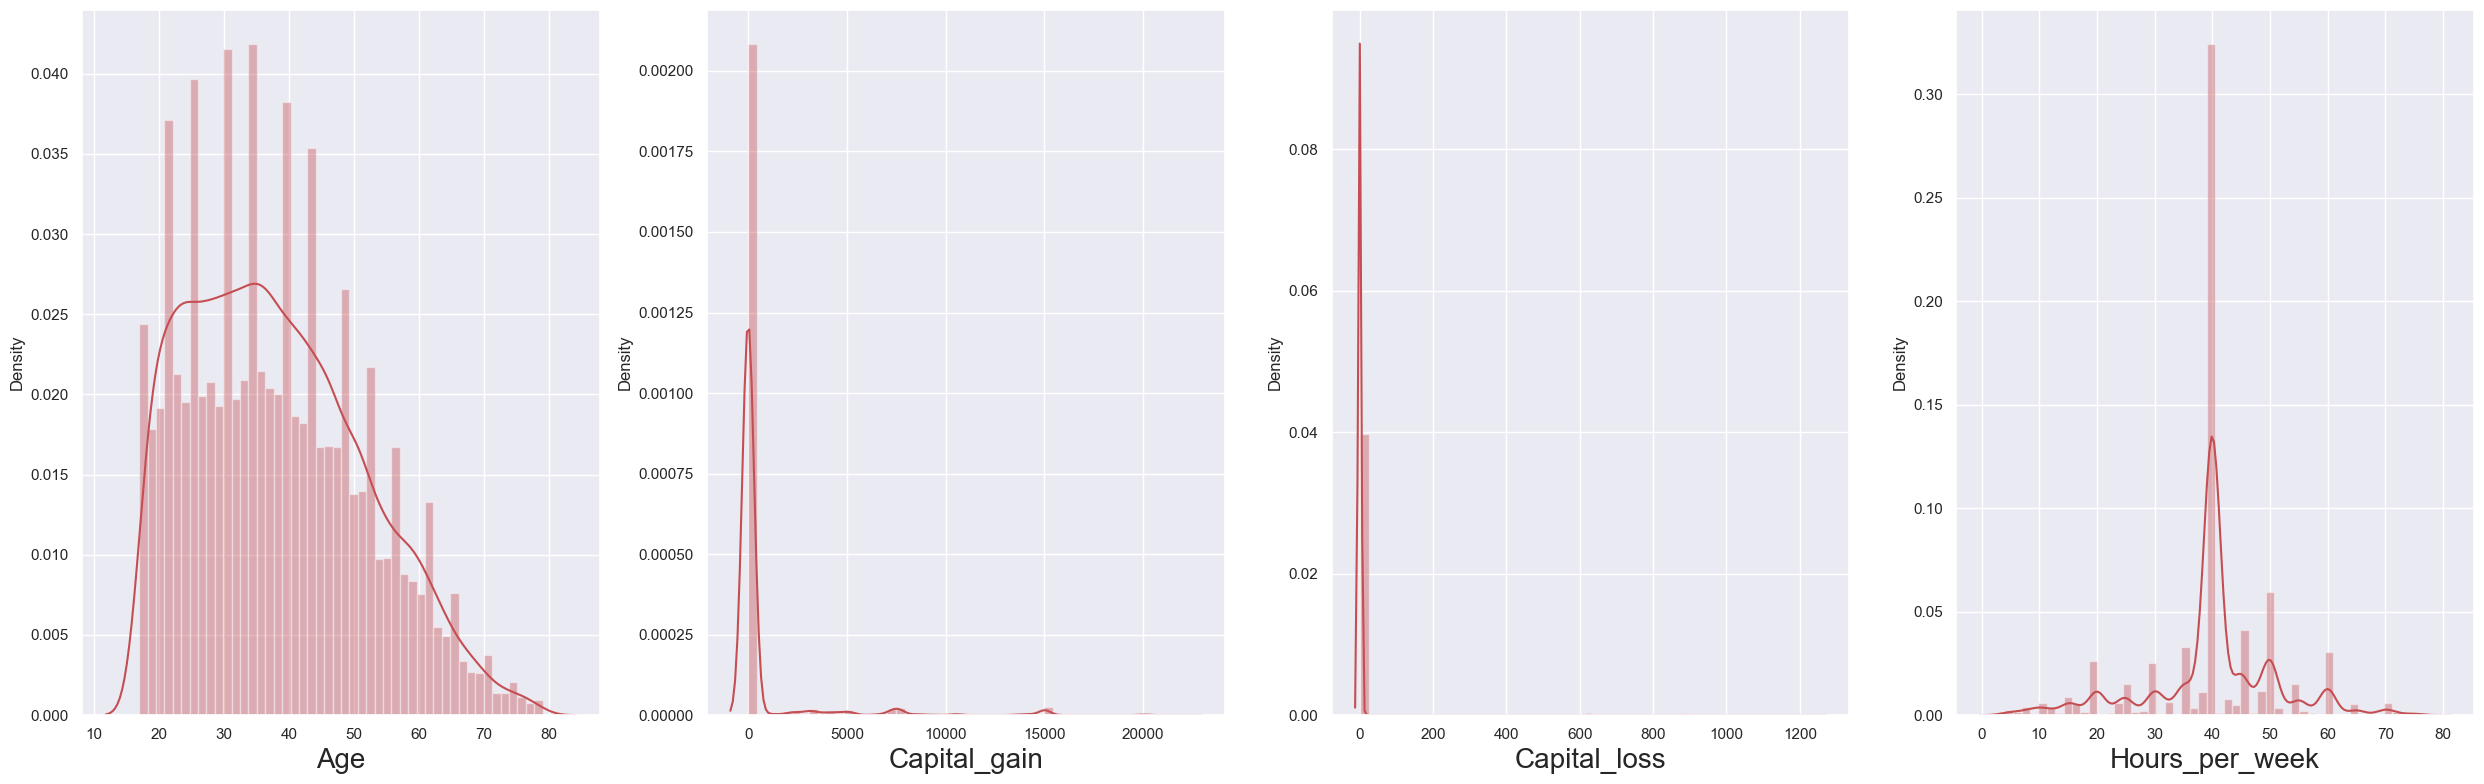

In [60]:
plt.figure(figsize=(25,8),facecolor='white')
plotnumber=1
for col in df[['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]:
    if plotnumber<=6:
        ax=plt.subplot(1,4,plotnumber)
        sns.distplot(df[col], color='r')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

In [61]:
df.skew()

Age                0.487918
Workclass          0.080746
Education_num     -0.147601
Marital_status    -0.046623
Occupation         0.015247
Relationship       0.752334
Race              -2.549199
Sex               -0.689977
Capital_gain       4.924729
Capital_loss      29.669292
Hours_per_week    -0.359365
Native_country    -5.348195
Income             1.322011
dtype: float64

# 3.Corrleation

In [62]:
df.corr()

Age  Workclass  Education_num  Marital_status  \
Age             1.000000   0.029674       0.045622       -0.286328   
Workclass       0.029674   1.000000      -0.002200       -0.015623   
Education_num   0.045622  -0.002200       1.000000       -0.058587   
Marital_status -0.286328  -0.015623      -0.058587        1.000000   
Occupation     -0.001610   0.008779       0.073142        0.036477   
Relationship   -0.270591  -0.057823      -0.092447        0.183248   
Race            0.021292   0.067532       0.080766       -0.084558   
Sex             0.089469   0.069617       0.003688       -0.125361   
Capital_gain    0.131998   0.011083       0.157858       -0.069601   
Capital_loss    0.023459  -0.010613       0.007348       -0.016396   
Hours_per_week  0.090783   0.028104       0.156303       -0.196053   
Native_country  0.037494   0.001938       0.149688       -0.032575   
Income          0.241844  -0.007699       0.320271       -0.194146   

                Occupation  Relationship      Race       Sex  Capital_gain  \
Age              -0.001610     -0.270591  0.021292  0.089469      0.131998   
Workclass         0.008779     -0.057823  0.067532  0.069617      0.011083   
Education_num     0.073142     -0.092447  0.080766  0.003688      0.157858   
Marital_status    0.036477      0.183248 -0.084558 -0.125361     -0.069601   
Occupation        1.000000     -0.038735  0.000613  0.051055      0.009446   
Relationship     -0.038735      1.000000 -0.146432 -0.577195     -0.089095   
Race              0.000613     -0.146432  1.000000  0.122731      0.031333   
Sex               0.051055     -0.577195  0.122731  1.000000      0.069539   
Capital_gain      0.009446     -0.089095  0.031333  0.069539      1.000000   
Capital_loss     -0.004779      0.030105  0.000186 -0.027323     -0.009077   
Hours_per_week   -0.022194     -0.261919  0.055486  0.236168      0.098705   
Native_country    0.018069     -0.011274  0.018660 -0.011189      0.019185   
Income            0.030664     -0.248263  0.094756  0.211792      0.343487   

                Capital_loss  Hours_per_week  Native_country    Income  
Age                 0.023459        0.090783        0.037494  0.241844  
Workclass          -0.010613        0.028104        0.001938 -0.007699  
Education_num       0.007348        0.156303        0.149688  0.320271  
Marital_status     -0.016396       -0.196053       -0.032575 -0.194146  
Occupation         -0.004779       -0.022194        0.018069  0.030664  
Relationship        0.030105       -0.261919       -0.011274 -0.248263  
Race                0.000186        0.055486        0.018660  0.094756  
Sex                -0.027323        0.236168       -0.011189  0.211792  
Capital_gain       -0.009077        0.098705        0.019185  0.343487  
Capital_loss        1.000000       -0.003440        0.002925 -0.016465  
Hours_per_week     -0.003440        1.000000        0.004380  0.233472  
Native_country      0.002925        0.004380        1.000000  0.047240  
Income             -0.016465        0.233472        0.047240  1.000000

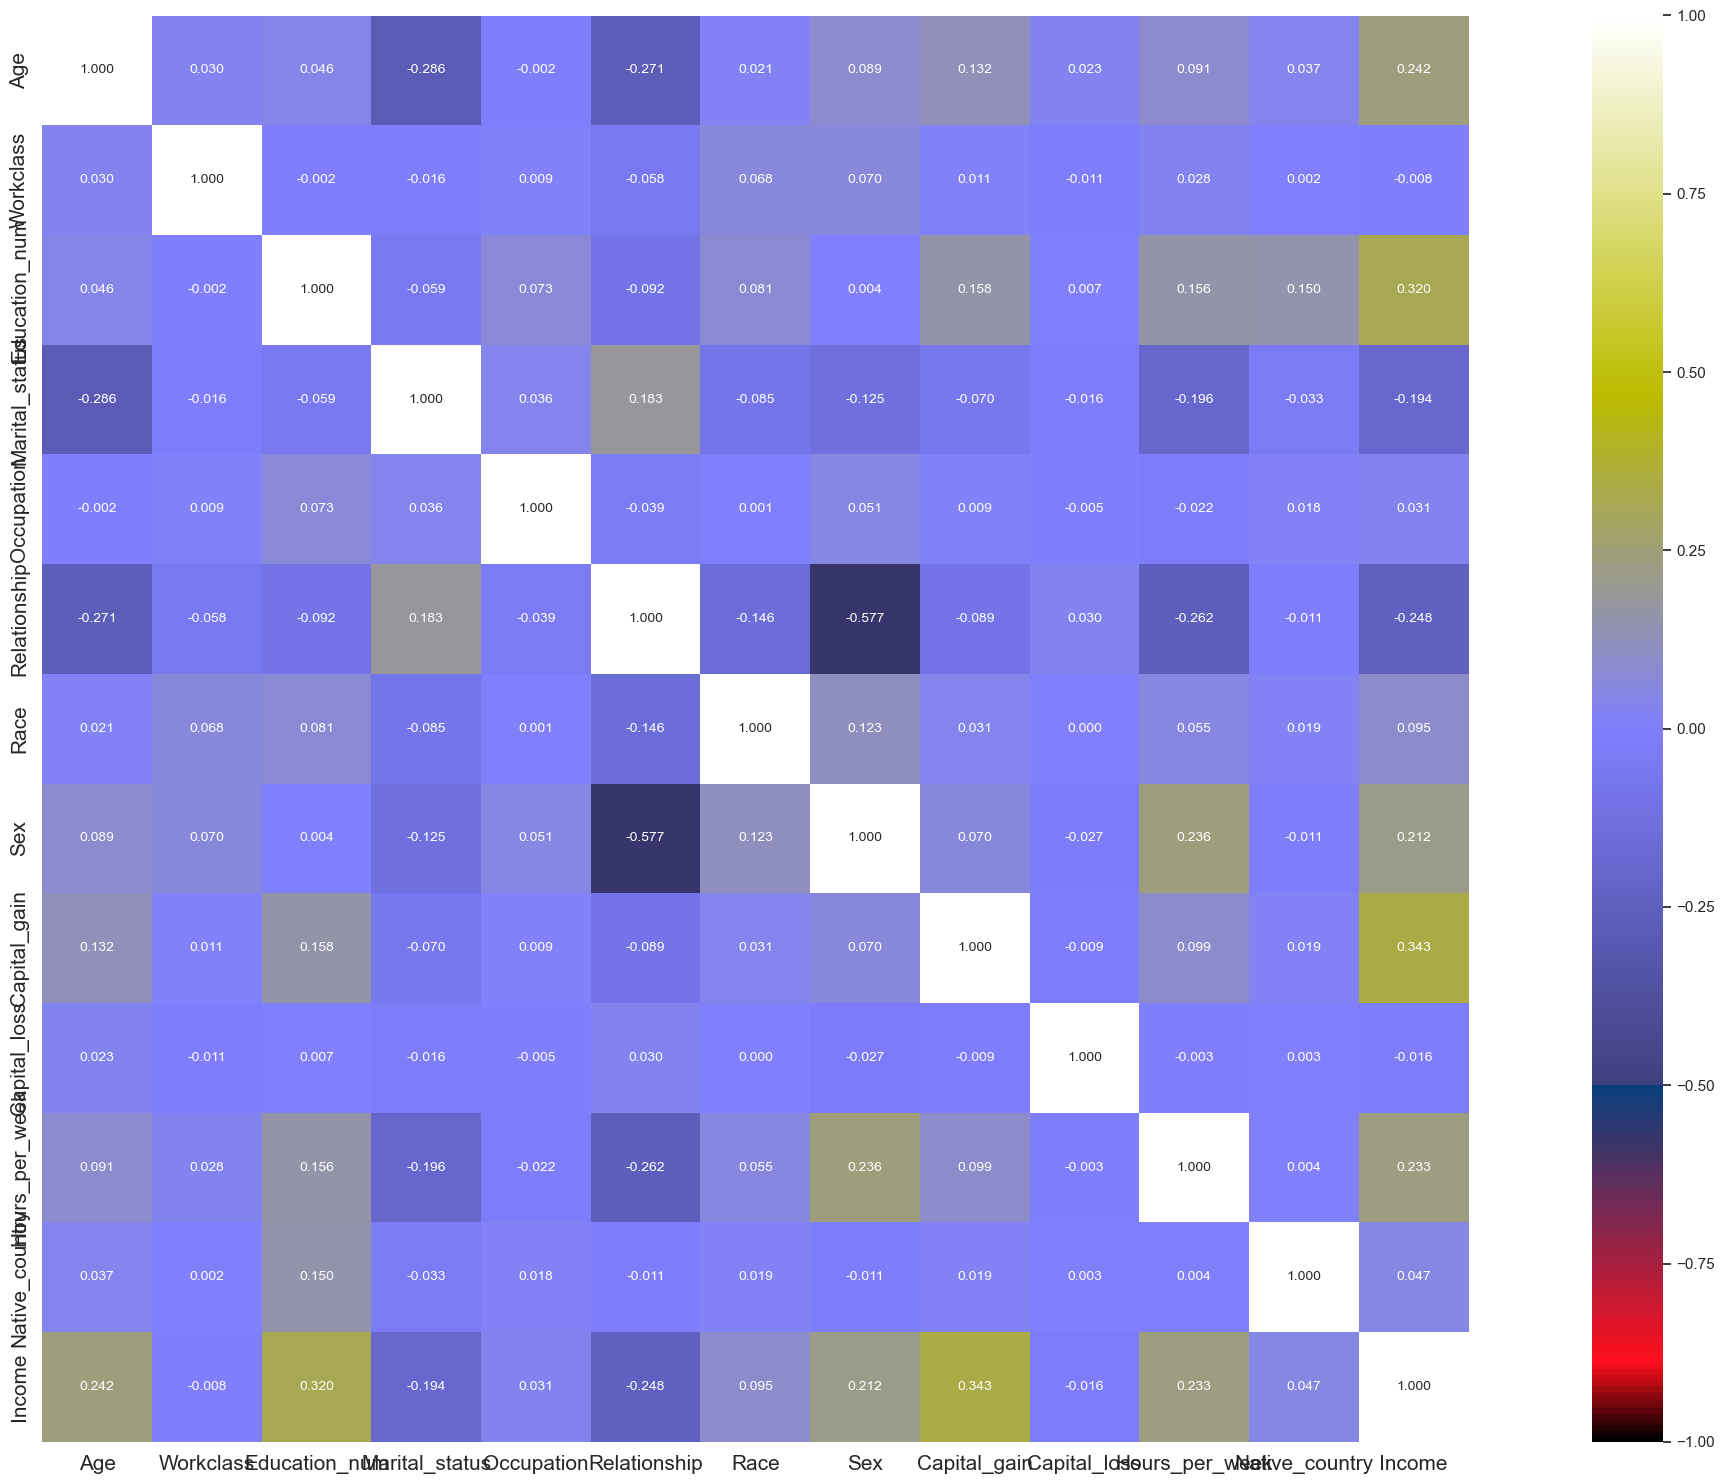

In [63]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',annot_kws={'size':10}, cmap='gist_stern')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

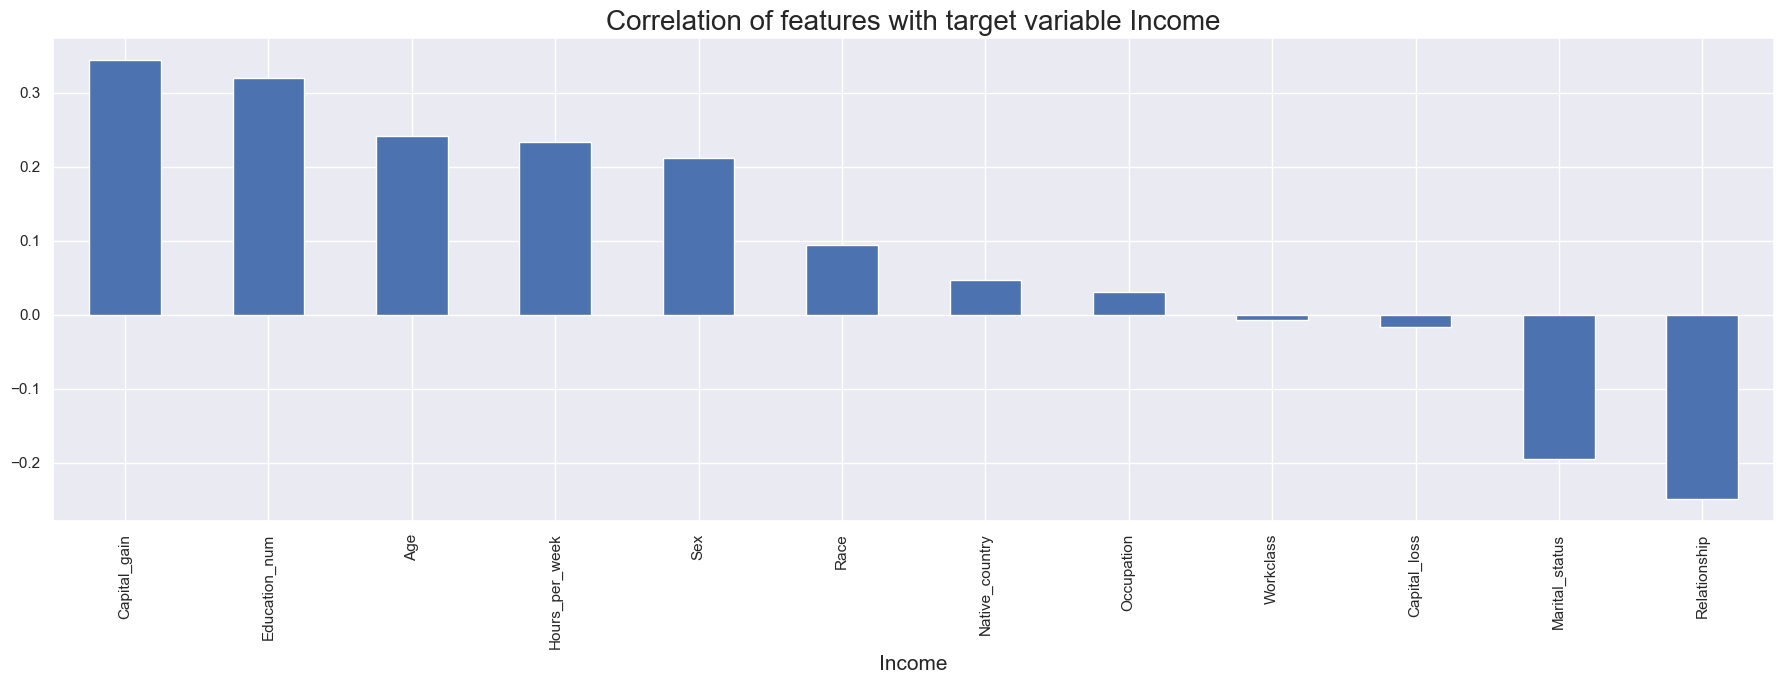

In [64]:
plt.figure(figsize=(18,7))
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar', color='b')
plt.xlabel('Features', fontsize=15)
plt.xlabel('Income', fontsize=15)
plt.title('Correlation of features with target variable Income', fontsize=20)
plt.show()

## 4.Check using variance_inflation_factor

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range (df.shape[1])]
vif['Features']= df.columns
vif

VIF        Features
0   10.452897             Age
1    8.807425       Workclass
2   21.287850   Education_num
3    4.358505  Marital_status
4    3.357557      Occupation
5    2.937270    Relationship
6   36.291318            Race
7    4.566872             Sex
8    1.209589    Capital_gain
9    1.004295    Capital_loss
10  15.202917  Hours_per_week
11  79.077624  Native_country
12   1.777448          Income

### 5. Balancing inbalanced target feature

In [66]:
df.Income.value_counts()

0    21767
1     6294
Name: Income, dtype: int64

## Balancing using SMOTE

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
X = df.drop(['Income'], axis = 1)
Y = df['Income']

In [69]:
oversample = SMOTE()
X,Y = oversample.fit_resample(X,Y)

In [70]:
Y.value_counts()

0    21767
1    21767
Name: Income, dtype: int64

## Standard Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# PCA

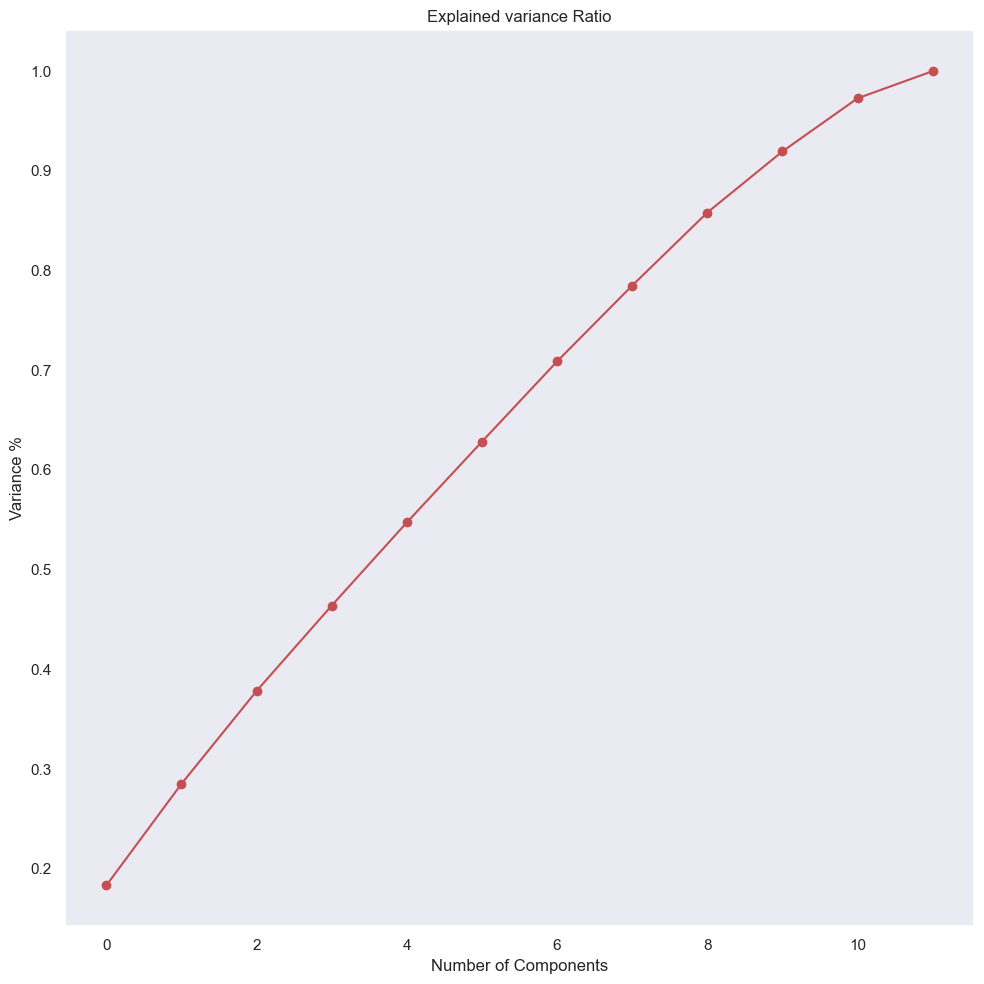

In [72]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [73]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [74]:
principle_x = pd.DataFrame(x_new,columns = np.arange(9))

# Machine Learnings Model Building

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.3)
print('Training feature matrix size:', X_train.shape)
print('Training target vector size:', Y_train.shape)
print('Test feature matrix size:', X_test.shape)
print('Test target vector size:', Y_test.shape)

Training feature matrix size: (30473, 12)
Training target vector size: (30473,)
Test feature matrix size: (13061, 12)
Test target vector size: (13061,)


## finding best Random state

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.777811806140418 on Random_state 29


In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=29, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7755148916622004


Confusion matrix of Logistics Regression : 
 [[5009 1527]
 [1405 5120]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      6536
           1       0.77      0.78      0.78      6525

    accuracy                           0.78     13061
   macro avg       0.78      0.78      0.78     13061
weighted avg       0.78      0.78      0.78     13061



In [85]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = []
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    
    model.fit(x_train, Y_train)
    y_pred= model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test, y_pred))
    rmse_val.append(error)
    print('RMSE value for k = ', K , 'is:', error)

RMSE value for k =  1 is: 0.7100512150322412
RMSE value for k =  2 is: 0.710266839457203
RMSE value for k =  3 is: 0.707187984714044
RMSE value for k =  4 is: 0.710266839457203
RMSE value for k =  5 is: 0.7111286833531423
RMSE value for k =  6 is: 0.7121507683001156
RMSE value for k =  7 is: 0.7112363404097508
RMSE value for k =  8 is: 0.7098355251077532
RMSE value for k =  9 is: 0.7083779003290572
RMSE value for k =  10 is: 0.7101590354284335
RMSE value for k =  11 is: 0.7092960133439309
RMSE value for k =  12 is: 0.7127418317776719


In [ ]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

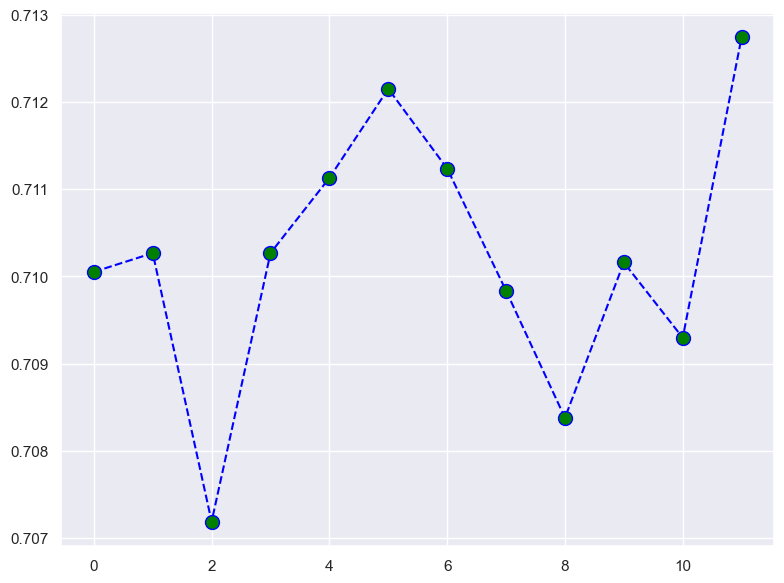

In [86]:
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='blue', linestyle= 'dashed', marker= 'o', markerfacecolor= 'green', markersize=10)

In [89]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('===========================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8362299977030855


Confusion matrix : 
 [[5099 1437]
 [ 702 5823]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      6536
           1       0.80      0.89      0.84      6525

    accuracy                           0.84     13061
   macro avg       0.84      0.84      0.84     13061
weighted avg       0.84      0.84      0.84     13061



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7774289870607151


Confusion matrix : 
 [[4850 1686]
 [1221 5304]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      6536
           1       0.76      0.81      0.78      6525

    accuracy                           0.78     13061
   macro avg       0.78      0.78      0.78     13061
weighted avg       0.78      0.78      0.78     

# Cross validation

In [90]:
from sklearn.model_selection import cross_val_score
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Valdation Score', m, ':'+'\033[0m\n]')
    print('Score :' , score)
    print('Mean Score:', score.mean())
    print('Std deviation :', score.std())
    print('\n')
    print('==================================================================')



Cross Valdation Score SVC() :
]
Score : [0.81290915 0.82221201 0.82577237 0.83461583 0.83712382]
Mean Score: 0.8265266365871747
Std deviation : 0.008744782261576893




Cross Valdation Score GaussianNB() :
]
Score : [0.70690249 0.72183301 0.72860917 0.7147123  0.72719963]
Mean Score: 0.7198513196194427
Std deviation : 0.008108098353671173




Cross Valdation Score DecisionTreeClassifier() :
]
Score : [0.78879063 0.81405765 0.83817618 0.83323762 0.83161038]
Mean Score: 0.8211744943237314
Std deviation : 0.018126491179713107




Cross Valdation Score KNeighborsClassifier(n_neighbors=3) :
]
Score : [0.8091191  0.84035833 0.85103939 0.8595383  0.85527223]
Mean Score: 0.8430654708217767
Std deviation : 0.018130787191655274




Cross Valdation Score RandomForestClassifier() :
]
Score : [0.83289307 0.85069484 0.86734811 0.87860342 0.86917069]
Mean Score: 0.8597420275798067
Std deviation : 0.01615686950272866




Cross Valdation Score ExtraTreesClassifier() :
]
Score : [0.83059607 0.85253245

## Hyper Parameter Tunning: GridSearchCV

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
parameter = {'criterion': ['gini', 'entropy'],
            'min_samples_split':[3,5,8],
            'max_depth' : [20,30,40,],
            'n_estimators': [100,150,200],
            }

In [95]:
GCV = GridSearchCV(RandomForestClassifier(), parameter, verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.874 total time=   4.3s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.868 total time=   4.3s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.876 total time=   3.8s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.876 total time=   4.2s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [101]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_split': 3,
 'n_estimators': 200}

## Final Model

In [98]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 200, max_depth=30 ,min_samples_split =8)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8784932241022892


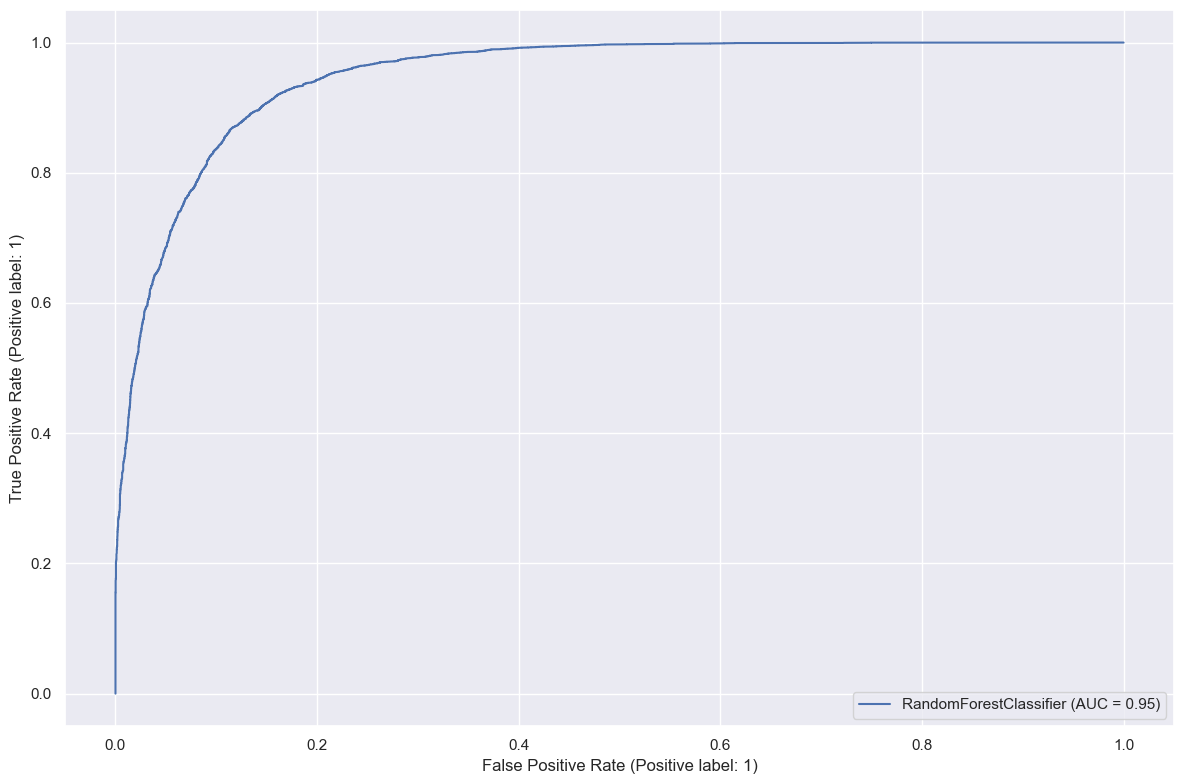

<Figure size 1000x1000 with 0 Axes>

Auc Score :
] 0.8785217035505095


In [99]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test, Y_test)
plt.legend(prop= {'size':11}, loc= 'lower right')
plt.figure(figsize = (10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n]', auc_score)

## Saving Model

In [100]:
import joblib 
joblib.dump(Final_mod,'Census_Income_Final.pkl')

['Census_Income_Final.pkl']